# 🏆 Game Day Analytics Competition 2025  
## 🥇 #1 Champions  

### **Super Bowl 59 Advertisement Analysis**  

This notebook (`ipynb`) is used for analyzing **X (formerly Twitter) data** to gain deeper insights into **consumer response** to advertisements aired during **Super Bowl 59**. By leveraging engagement metrics such as likes, retweets, replies, quotes, and bookmarks as well tweet sentiment, we aim to identify the most impactful ads and brand strategies. Our analysis demonstrated that overall sentiment on X **directly correlates with Stock Market performance** in the week following the Super Bowl.

The following is the code used to clean, analyze, model, and visualize the data in order to draw competition winning insights.

**AUTHOR:** Jack Doughty

**CONTACT:** jackdoughty63@gmail.com

**LINKEDIN:** www.linkedin.com/in/jack-doughty1

In [1]:
import pandas as pd
import warnings
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore all warnings
warnings.filterwarnings('ignore')

#  Import TWEETS

In [67]:
df_tweets = pd.read_csv('final_dataset_2025_for_release.csv')
df_tweets.head()

created_at  \
0  2025-02-10T03:16:57.000Z   
1  2025-02-10T03:16:49.000Z   
2  2025-02-10T03:16:48.000Z   
3  2025-02-10T03:16:46.000Z   
4  2025-02-10T03:16:46.000Z   

                                                text      conversation_id  \
0  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789225308409951   
1  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789188876894329   
2  THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...  1888789186284503124   
3                               I love you @TomBrady  1888789179074793761   
4                               I love you @TomBrady  1888789179074793761   

  reply_settings   edit_history_tweet_ids lang  \
0       everyone  ['1888789225308409951']   es   
1       everyone  ['1888789188876894329']   es   
2       everyone  ['1888789186284503124']   en   
3       everyone  ['1888789179074793761']   en   
4       everyone  ['1888789179074793761']   en   

                                   referenced_tweets  possibly_sensitive  \
0  [{'type': 'retweeted', 'id': '1888782268186890...               False   
1  [{'type': 'retweeted', 'id': '1888782268186890...               False   
2                                                NaN               False   
3                                                NaN               False   
4                                                NaN               False   

                    id   author_id  ... entities.cashtags  \
0  1888789225308409951   206743570  ...               NaN   
1  1888789188876894329   282285390  ...               NaN   
2  1888789186284503124   246885450  ...               NaN   
3  1888789179074793761  1921582838  ...               NaN   
4  1888789179074793761  1921582838  ...               NaN   

                location      username                 name    brand  \
0                    NaN    juanmelriv  || •)🇮🇩 Juan P Melo  Dunkin'   
1          BIEBERLANDIA♡  Camila110598                Camm♡  Dunkin'   
2  Monterrey, Nuevo León      SevazCFM            Sebastián  Dunkin'   
3            Detroit, MI      Vince_4L          Harvey Dent  Dunkin'   
4            Detroit, MI      Vince_4L          Harvey Dent  Dunkin'   

       geo.place_id  attachments.poll_ids  withheld.country_codes  \
0               NaN                   NaN                     NaN   
1               NaN                   NaN                     NaN   
2  b19e24ce42ccd6aa                   NaN                     NaN   
3               NaN                   NaN                     NaN   
4               NaN                   NaN                     NaN   

   geo.coordinates.type  geo.coordinates.coordinates  
0                   NaN                          NaN  
1                   NaN                          NaN  
2                   NaN                          NaN  
3                   NaN                          NaN  
4                   NaN                          NaN  

[5 rows x 36 columns]

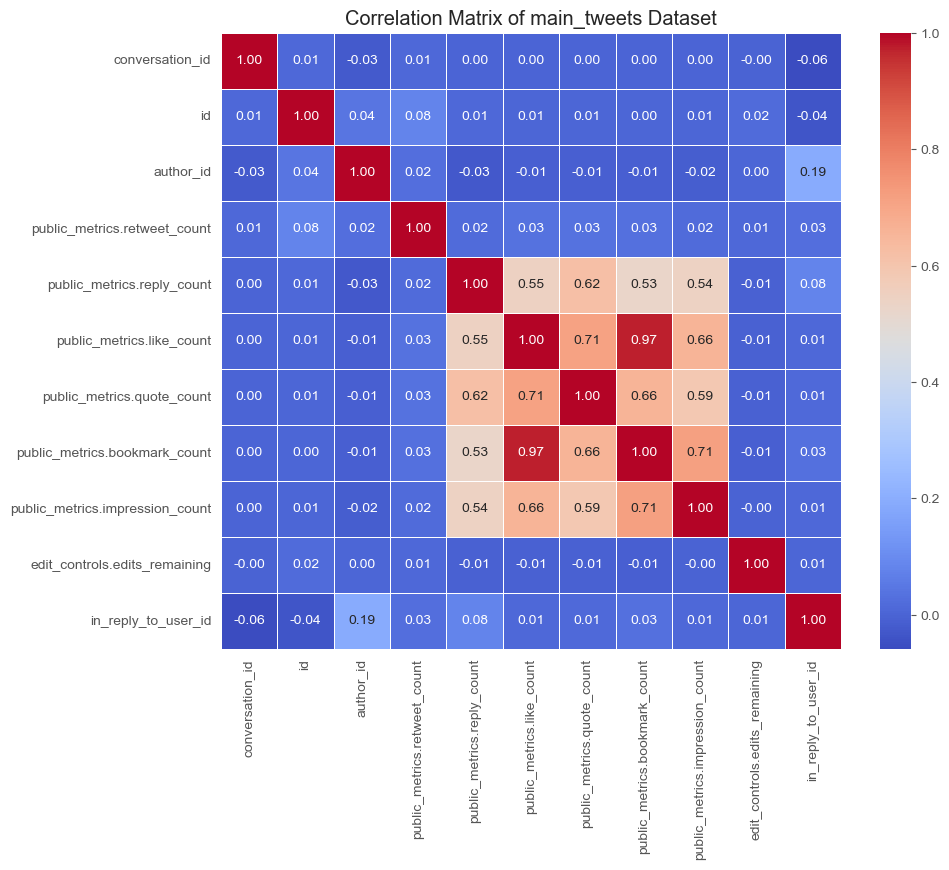

In [68]:
# Selecting only numeric columns
numeric_cols = df_tweets.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of main_tweets Dataset")
plt.show()

# Import AD sentiments

In [69]:
df_sentiment = pd.read_csv('sentiments_by_brands2025.csv')
df_sentiment.head(60)

brand  Negative  Neutral  Positive
0             Angel Soft        15       41        44
1            Booking.com        15       49        36
2                  Bosch        15       55        30
3              Bud Light       462    10503      1657
4              Budweiser         2      482        65
5            Busch Light        15       67        18
6                 Cirkul         5       44        51
7            Coffee mate        99      341       220
8            Coors Light         9       54        37
9                 Disney       552     6025      3820
10              DoorDash       318      868       785
11               Doritos       441     2410      1092
12                  Dove       148      189       104
13               Dunkin'      1319     4620      4852
14              Duracell        13       49        38
15                  FCAS        58       26        16
16               FanDuel       215      517       429
17                 Fetch       151      989       283
18               GoDaddy        14       50        34
19                Google       567     5270      1720
20          Häagen-Dazs        21       43        36
21            Hellmann's        29      106        57
22               HexClad        13       49        38
23           Hims & Hers       437      599      1007
24             Homes.com      1491     2839      2761
25             Instacart       305      360       280
26                  Jeep        30      101       279
27                  Lays       600     5820      3444
28          Liquid Death        52       29        19
29        Little Caesars       277      783       520
30           MSC Cruises         8      271        46
31                  Meta        78      971       125
32        Michelob Ultra        67     4594      2699
33          Mountain Dew        22       36        42
34                   NFL       962     4838      3268
35            NerdWallet        13       51        35
36                 Nerds        44       86        69
37            Nerdwallet        11       50        38
38                  Nike       188      937      1520
39              Novartis       178      154       122
40                 Oikos        10       71        19
41                 Poppi        89      241        89
42              Pringles        20       50        30
43                   Ram        30      378       113
44               RedBull        49      116        45
45               Reese's        18       42        40
46                  Ritz        65      126        25
47       Rocket Mortgage        10       28        62
48              Skechers        10       63        27
49           Squarespace         4       69       127
50         Stella Artois        10      168        44
51             Taco Bell        81      317       128
52  Totino's Pizza Rolls        25       35        40
53                  Tubi       397     2087      1345
54              TurboTax       664    10105      3180
55             Uber Eats         4       61        35
56           WeatherTech        16       25        59
57              hegetsus       763     2169      1803
58                openai        97      693       369

# Import Ads

In [8]:
df_ads = pd.read_csv('ad_data - Sheet1.csv')

#Do Some cleaning
df_ads.rename(columns={'Brand': 'brand'}, inplace=True)
df_ads['Transcript'] = df_ads['Transcript'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df_ads.head(5)

brand              Sentiment  \
0   Angel Soft      Playful, Humorous   
1  Booking.com  Empowering, Energetic   
2        Bosch     Playful, Energetic   
3  Coors Light    Absurdity, Humorous   
4    Bud Light     Playful, Energetic   

                                          Transcript  
0  angel soft interrupts this broadcast to bring ...  
1  with hotels and vacation rentals bookingcom ha...  
2  you may know me as antonio vas but when i use ...  
3  happy monday what a game last night monday mon...  
4  you want to go fishing tomorrow i got a colono...

In [9]:
df_ads['Transcript'].head(60)

0     angel soft interrupts this broadcast to bring ...
1     with hotels and vacation rentals bookingcom ha...
2     you may know me as antonio vas but when i use ...
3     happy monday what a game last night monday mon...
4     you want to go fishing tomorrow i got a colono...
5     oh still too little buddy theres a reason for ...
6     hey babe chloe you got cirkul right yeah of co...
7     applause music go im a dancing tongue and i ap...
8     what if there was no galaxy far far away and t...
9     we need to talk about your finances my finance...
10    okay so doritos has asked their fans to make t...
11    at 3 these legs are unstoppable at 14 shell th...
12    welcome to java ja battle of the coffee brand ...
13    all right tom your thoughts yeah well um appla...
14    only from fanduel americas number one sports b...
15    i cant wait for america to see this its going ...
16    actors we can make you believe we know what we...
17    i cant believe they let us back in this pl

### one hot encoding of ad sentiments

In [10]:
all_labels = set()
df_ads['Sentiment'].str.split(', ').apply(all_labels.update)  # Get all unique labels

# Step 2: Create one-hot encoded columns
for label in sorted(all_labels):  # Sorting ensures consistent column order
    df_ads[label] = df_ads['Sentiment'].apply(lambda x: 1 if label in x else 0)

# Display the final DataFrame

In [11]:
df_ads.head()

brand              Sentiment  \
0   Angel Soft      Playful, Humorous   
1  Booking.com  Empowering, Energetic   
2        Bosch     Playful, Energetic   
3  Coors Light    Absurdity, Humorous   
4    Bud Light     Playful, Energetic   

                                          Transcript  Absurdity  Empowering  \
0  angel soft interrupts this broadcast to bring ...          0           0   
1  with hotels and vacation rentals bookingcom ha...          0           1   
2  you may know me as antonio vas but when i use ...          0           0   
3  happy monday what a game last night monday mon...          1           0   
4  you want to go fishing tomorrow i got a colono...          0           0   

   Energetic  Humorous  Nostalgic  Playful  
0          0         1          0        1  
1          1         0          0        0  
2          1         0          0        1  
3          0         1          0        0  
4          1         0          0        1

### Merge with Tweet sentiment counts

In [12]:
df_merged = pd.merge(df_ads, df_sentiment, on='brand', how='inner')
df_merged.to_csv("ads_sentiments_response.csv", index=False)
df_merged.head()

brand              Sentiment  \
0   Angel Soft      Playful, Humorous   
1  Booking.com  Empowering, Energetic   
2        Bosch     Playful, Energetic   
3  Coors Light    Absurdity, Humorous   
4    Bud Light     Playful, Energetic   

                                          Transcript  Absurdity  Empowering  \
0  angel soft interrupts this broadcast to bring ...          0           0   
1  with hotels and vacation rentals bookingcom ha...          0           1   
2  you may know me as antonio vas but when i use ...          0           0   
3  happy monday what a game last night monday mon...          1           0   
4  you want to go fishing tomorrow i got a colono...          0           0   

   Energetic  Humorous  Nostalgic  Playful  Negative  Neutral  Positive  
0          0         1          0        1        15       41        44  
1          1         0          0        0        15       49        36  
2          1         0          0        1        15       55        30  
3          0         1          0        0         9       54        37  
4          1         0          0        1       462    10503      1657

### Most common words in ad scripts:

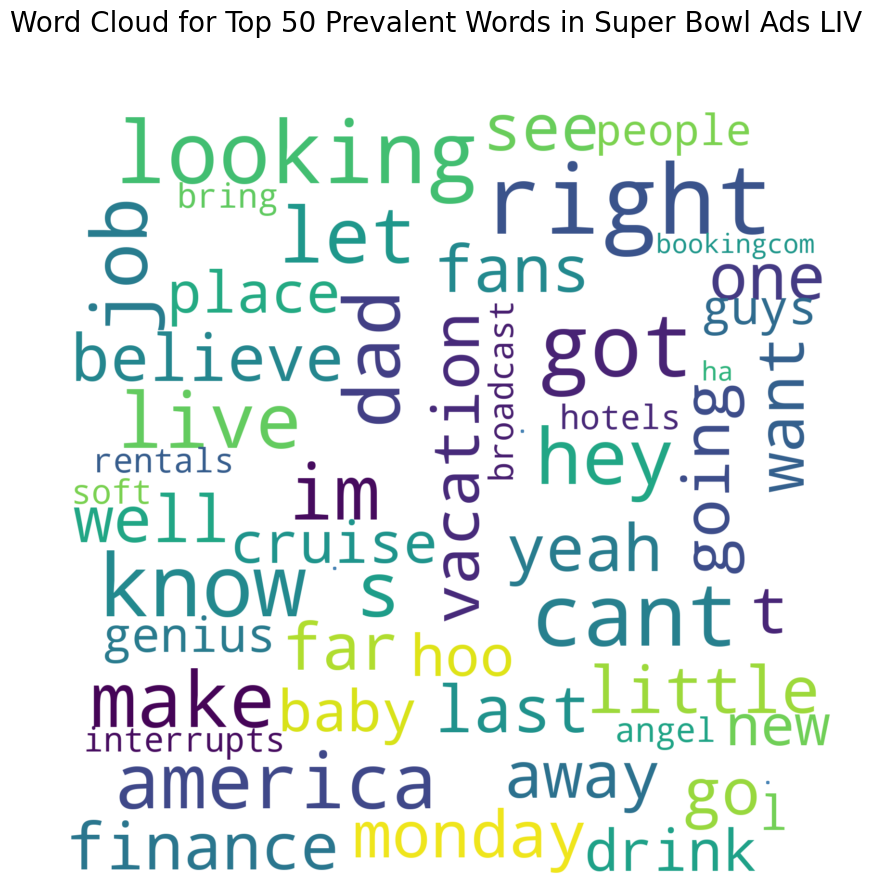

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load Twitter bird silhouette (ensure the image is in the same directory or provide a full path)
twitter_mask = np.array(Image.open("x_logo.png"))  # Use a black-and-white Twitter bird image

word_cloud = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1
).generate(str(df_ads['Transcript']))

fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Top 50 Prevalent Words in Super Bowl Ads LIV', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

In [14]:
pos = {}
neg = {}
neutral = {}
pos_count = {}
neg_count = {}

# Compute sentiment proportions and counts for each brand
for index, row in df_merged.iterrows():
    total = row[9] + row[10] + row[11]
    if total > 0:  # Avoid division by zero
        neg[row[0]] = row[9] / total
        neutral[row[0]] = row[10] / total
        pos[row[0]] = row[11] / total
        
        # Store actual counts
        neg_count[row[0]] = row[9]
        pos_count[row[0]] = row[11]
    else:
        neg[row[0]] = neutral[row[0]] = pos[row[0]] = 0
        neg_count[row[0]] = pos_count[row[0]] = 0

# Find the brand with the highest count of positive and negative tweets
most_positive_brand = max(pos_count, key=pos_count.get)
most_negative_brand = max(neg_count, key=neg_count.get)

# Retrieve sentiment values for the most positive and most negative brands
most_positive_sentiments = df_merged.loc[df_merged.iloc[:, 0] == most_positive_brand, 'Sentiment']
most_negative_sentiments = df_merged.loc[df_merged.iloc[:, 0] == most_negative_brand, 'Sentiment']

# Print the results
print(f"Brand with the most positive tweets: {most_positive_brand}")
print(f"Positive Tweet Count: {pos_count[most_positive_brand]}")
print(f"Sentiments: {most_positive_sentiments.tolist()}")

print(f"\nBrand with the most negative tweets: {most_negative_brand}")
print(f"Negative Tweet Count: {neg_count[most_negative_brand]}")
print(f"Sentiments: {most_negative_sentiments.tolist()}")

Brand with the most positive tweets: Dunkin'
Positive Tweet Count: 4852
Sentiments: ['Playful, Humorous']

Brand with the most negative tweets: Homes.com
Negative Tweet Count: 1491
Sentiments: ['Playful, Humorous']


### Check for best and worst ads according to X

In [15]:
pos = {}
neg = {}
neutral = {}

for index, row in df_merged.iterrows():
    total = row[9] + row[10] + row[11]
    neg[row[0]] = row[9] / total
    neutral[row[0]] = row[10] / total
    pos[row[0]] = row[11] / total

# Get top 5 most positive ads
sorted_pos = dict(sorted(pos.items(), key=lambda item: item[1], reverse=True)[:10])
sorted_neg = dict(sorted(neg.items(), key=lambda item: item[1], reverse=True)[:10])

# Retrieve sentiment values for the top 5 brands
print("Top 10 POSITIVE")
count = 1

for brand in sorted_pos.keys():
    sentiments = df_merged.loc[df_merged.iloc[:, 0] == brand, 'Sentiment']
    print(f"{count}. Brand: {brand}, Sentiment(s): {sentiments.tolist()}")
    count+=1
    
print("Top 10 NEGATIVE")
count = 1
for brand in sorted_neg.keys():
    sentiments = df_merged.loc[df_merged.iloc[:, 0] == brand, 'Sentiment']
    print(f"{count}. Brand: {brand}, Sentiment(s): {sentiments.tolist()}")
    count+=1

Top 10 POSITIVE
1. Brand: Jeep, Sentiment(s): ['Empowering, Nostalgic']
2. Brand: Squarespace, Sentiment(s): ['Absurdity, Humorous']
3. Brand: Rocket Mortgage, Sentiment(s): ['Nostalgic, Empowering']
4. Brand: WeatherTech, Sentiment(s): ['Energetic, Humorous']
5. Brand: Nike, Sentiment(s): ['Empowering, Energetic']
6. Brand: Cirkul, Sentiment(s): ['Playful, Energetic']
7. Brand: Hims & Hers, Sentiment(s): ['Empowering, Energetic']
8. Brand: Dunkin', Sentiment(s): ['Playful, Humorous']
9. Brand: Angel Soft, Sentiment(s): ['Playful, Humorous']
10. Brand: Mountain Dew, Sentiment(s): ['Playful, Energetic']
Top 10 NEGATIVE
1. Brand: FCAS, Sentiment(s): ['Empowering, Nostalgic']
2. Brand: Liquid Death, Sentiment(s): ['Playful, Energetic']
3. Brand: Novartis, Sentiment(s): ['Empowering, Energetic']
4. Brand: Dove, Sentiment(s): ['Empowering, Nostalgic']
5. Brand: Instacart, Sentiment(s): ['Playful, Humorous']
6. Brand: Ritz, Sentiment(s): ['Humorous, Absurdity']
7. Brand: Totino's Pizza Rolls

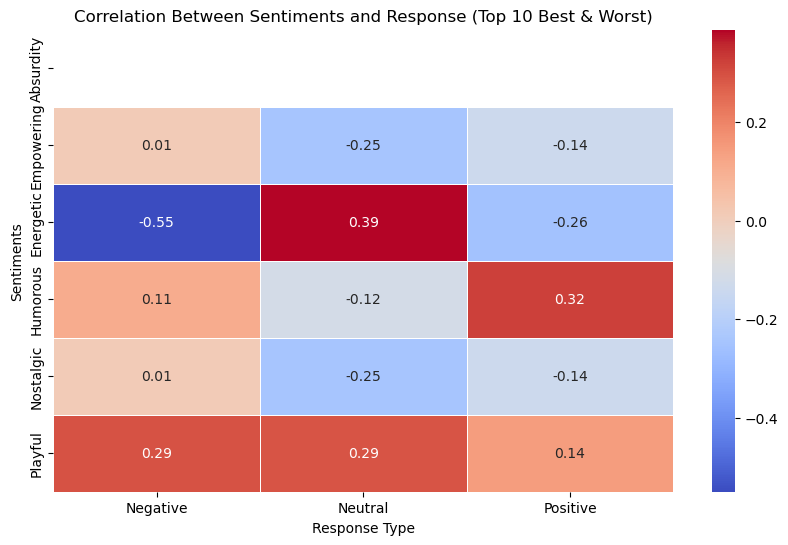

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sentiment and response columns
sentiment_columns = ["Absurdity", "Empowering", "Energetic", "Humorous", "Nostalgic", "Playful"]
response_columns = ["Negative", "Neutral", "Positive"]

# Select top 10 most positive brands
top_10_pos = df_merged.nlargest(10, "Positive")

# Select top 10 most negative brands
top_10_neg = df_merged.nlargest(10, "Negative")

# Merge both into one DataFrame
top_20_df = pd.concat([top_10_pos, top_10_neg]).drop_duplicates()

# Compute correlation only for the selected brands
correlation_matrix = top_20_df[sentiment_columns + response_columns].corr()

# Extract sentiment-to-response correlations
correlation_subset = correlation_matrix.loc[sentiment_columns, response_columns]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Labels and title
plt.title("Correlation Between Sentiments and Response (Top 10 Best & Worst)")
plt.xlabel("Response Type")
plt.ylabel("Sentiments")

# Show the heatmap
plt.show()

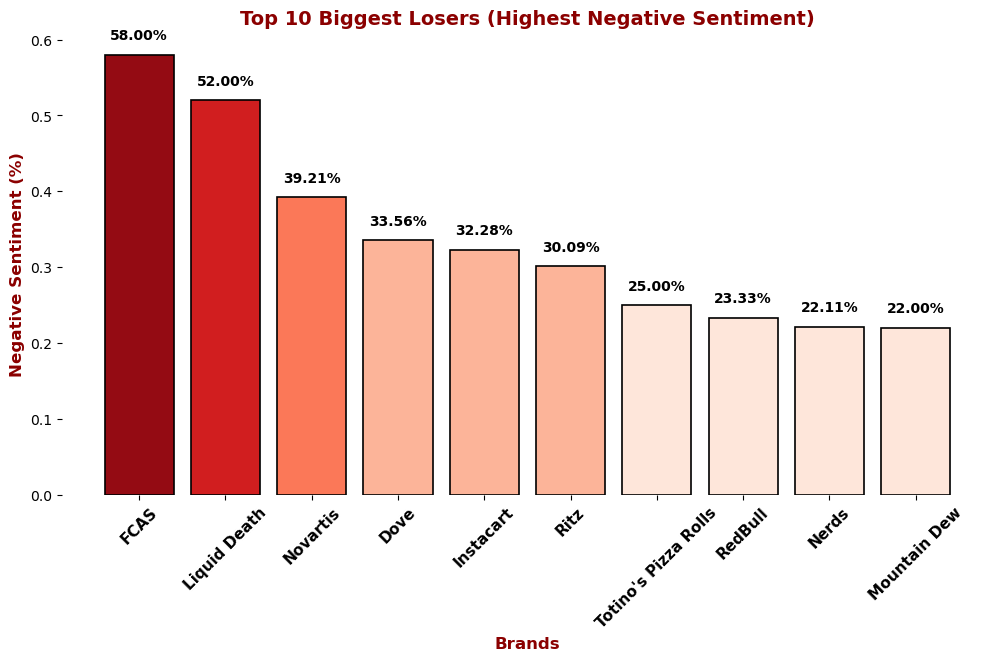

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize the values to map colors correctly
values = list(sorted_neg.values())
norm = plt.Normalize(min(values), max(values))  # Normalize for color mapping
colors = sns.color_palette("Reds", len(sorted_neg))  # Use "Reds" colormap

# Sort colors from light to dark based on normalized values
sorted_colors = [colors[int(norm(v) * (len(colors) - 1))] for v in values]

# Create figure with transparent background
fig, ax = plt.subplots(figsize=(12, 6), facecolor="none")  # Transparent figure
ax.set_facecolor("none")  # Transparent plot background

# Plot bars
bars = plt.bar(sorted_neg.keys(), sorted_neg.values(), color=sorted_colors, edgecolor="black", linewidth=1.2)

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f"{bar.get_height():.2%}", ha='center', fontsize=10, fontweight='bold', color="black")

# Labels and title
plt.xlabel("Brands", fontsize=12, fontweight='bold', color="darkred")
plt.ylabel("Negative Sentiment (%)", fontsize=12, fontweight='bold', color="darkred")
plt.title("Top 10 Biggest Losers (Highest Negative Sentiment)", fontsize=14, fontweight='bold', color="darkred")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=11, fontweight='bold')

# Remove background grid and spines for a cleaner look
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()

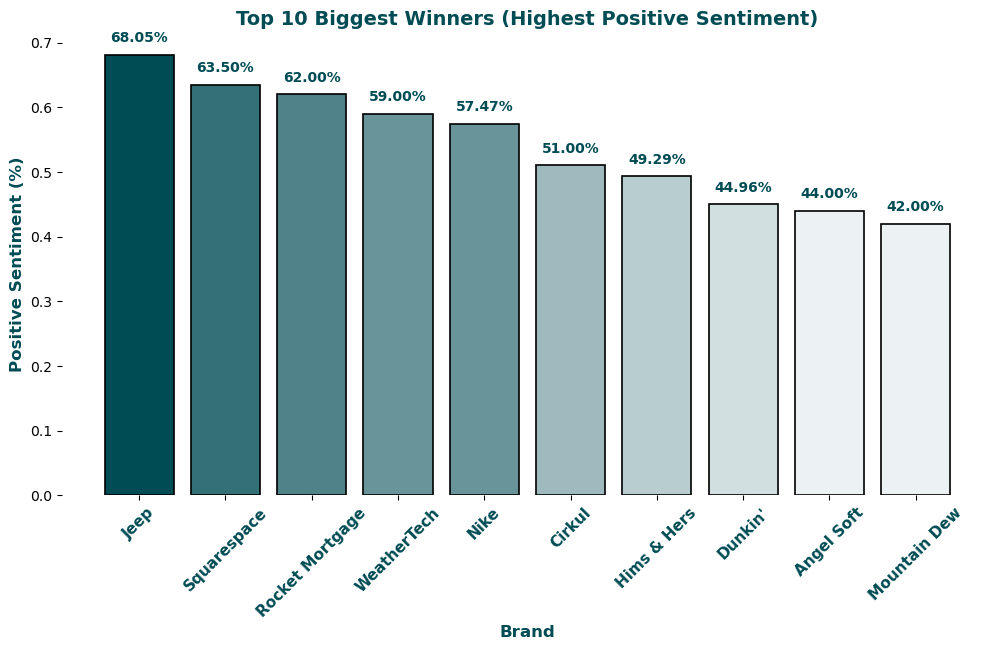

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the Eagles' color gradient from darkest green to lightest
eagles_green_gradient = sns.light_palette("#004C54", len(sorted_pos), reverse=False)  # Dark to light green

# Normalize the values for color mapping
values = list(sorted_pos.values())
norm = plt.Normalize(min(values), max(values))  # Normalize for gradient mapping

# Assign colors based on value ranking (darkest green for highest, lighter for lower)
sorted_colors = [eagles_green_gradient[int(norm(v) * (len(eagles_green_gradient) - 1))] for v in values]

# Create figure with transparent background
fig, ax = plt.subplots(figsize=(12, 6), facecolor="none")  # Transparent figure background
ax.set_facecolor("none")  # Transparent plot background

# Plot bars
bars = plt.bar(sorted_pos.keys(), sorted_pos.values(), color=sorted_colors, edgecolor="black", linewidth=1.2)

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f"{bar.get_height():.2%}", ha='center', fontsize=10, fontweight='bold', color="#004C54")

# Labels and title
plt.xlabel("Brand", fontsize=12, fontweight='bold', color="#004C54")
plt.ylabel("Positive Sentiment (%)", fontsize=12, fontweight='bold', color="#004C54")
plt.title("Top 10 Biggest Winners (Highest Positive Sentiment)", fontsize=14, fontweight='bold', color="#004C54")

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=11, fontweight='bold', color="#004C54")

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()

In [19]:
print(sorted_pos.keys(), sorted_pos.values())

dict_keys(['Jeep', 'Squarespace', 'Rocket Mortgage', 'WeatherTech', 'Nike', 'Cirkul', 'Hims & Hers', "Dunkin'", 'Angel Soft', 'Mountain Dew']) dict_values([0.6804878048780488, 0.635, 0.62, 0.59, 0.5746691871455577, 0.51, 0.49290259422418015, 0.4496339542211102, 0.44, 0.42])


### Create tweet sentiment counts per ad sentiment

In [70]:
sentiments = ['Absurdity', 'Empowering', 'Energetic', 'Humorous', 'Nostalgic', 'Playful']
filtered_dfs = []
pos = {}
neg = {}
neutral = {}
for sentiment in sentiments:
    filtered_df = df_merged[df_merged[sentiment] == 1]
    filtered_dfs.append(filtered_df)
    neg_counts = filtered_df['Negative'].sum()
    pos_counts = filtered_df['Positive'].sum()
    neut_counts = filtered_df['Neutral'].sum()
    
    neg[sentiment] = neg_counts
    pos[sentiment] = pos_counts
    neutral[sentiment] = neut_counts
print(f"pos: {pos}")
print(f"neg: {neg}")
print(f"neutral: {neutral}")


pos: {'Absurdity': 1004, 'Empowering': 13903, 'Energetic': 10297, 'Humorous': 21875, 'Nostalgic': 10923, 'Playful': 20518}
neg: {'Absurdity': 448, 'Empowering': 4198, 'Energetic': 2678, 'Humorous': 6070, 'Nostalgic': 3234, 'Playful': 6562}
neutral: {'Absurdity': 2545, 'Empowering': 22239, 'Energetic': 22632, 'Humorous': 36590, 'Nostalgic': 19158, 'Playful': 41022}


# BAR CHART

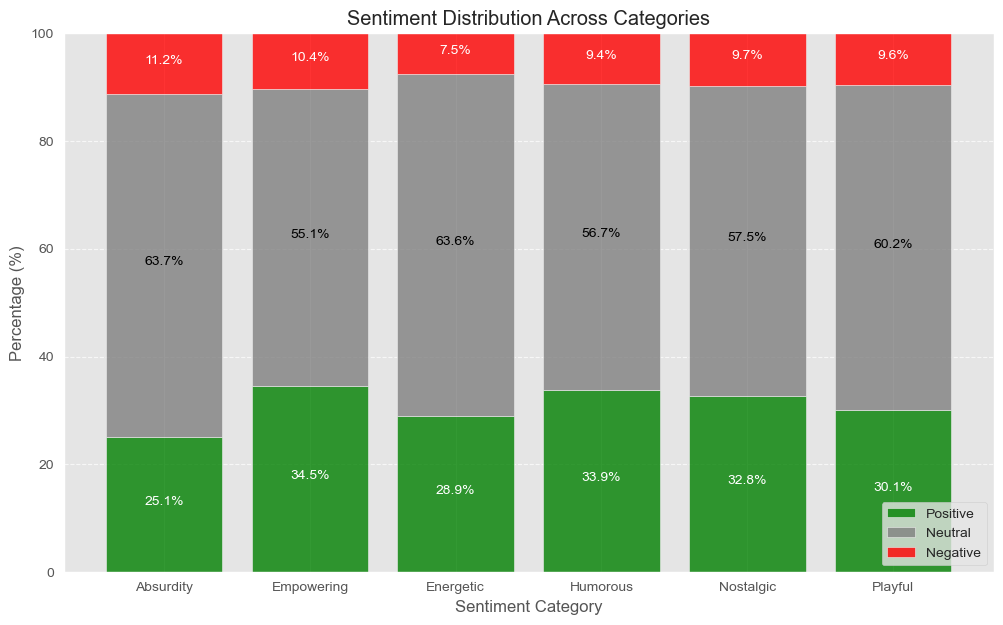

In [71]:
# Extract categories and sentiment values
categories = list(pos.keys())
positive_counts = np.array([pos[c] for c in categories])
negative_counts = np.array([neg[c] for c in categories])
neutral_counts = np.array([neutral[c] for c in categories])

# Compute percentages
total_counts = positive_counts + negative_counts + neutral_counts
positive_percent = (positive_counts / total_counts) * 100
negative_percent = (negative_counts / total_counts) * 100
neutral_percent = (neutral_counts / total_counts) * 100

# Create a stacked bar chart
plt.figure(figsize=(12, 7))
plt.bar(categories, positive_percent, color='green', label='Positive', alpha=0.8)
plt.bar(categories, neutral_percent, bottom=positive_percent, color='gray', label='Neutral', alpha=0.8)
plt.bar(categories, negative_percent, bottom=positive_percent + neutral_percent, color='red', label='Negative', alpha=0.8)

# Formatting
plt.xlabel("Sentiment Category")
plt.ylabel("Percentage (%)")
plt.title("Sentiment Distribution Across Categories")
plt.legend()
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for i, cat in enumerate(categories):
    plt.text(i, positive_percent[i] / 2, f"{positive_percent[i]:.1f}%", ha='center', color='white', fontsize=10)
    plt.text(i, positive_percent[i] + (neutral_percent[i] / 2), f"{neutral_percent[i]:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(i, 100 - (negative_percent[i] / 2), f"{negative_percent[i]:.1f}%", ha='center', color='white', fontsize=10)

# Show plot
plt.show()

# RADAR CHART

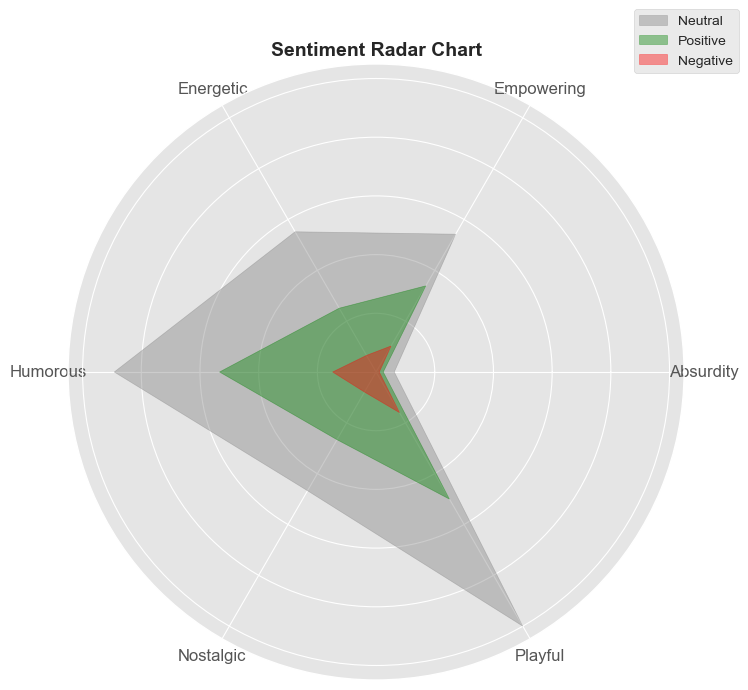

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Categories
categories = list(pos.keys())
num_vars = len(categories)

# Convert data into lists and normalize
pos_values = list(pos.values())
neg_values = list(neg.values())
neutral_values = list(neutral.values())

# Normalize data
max_value = max(max(pos_values), max(neg_values), max(neutral_values))
pos_values = [v / max_value for v in pos_values]
neg_values = [v / max_value for v in neg_values]
neutral_values = [v / max_value for v in neutral_values]

# Compute angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Close the loop for radar chart
pos_values += pos_values[:1]
neg_values += neg_values[:1]
neutral_values += neutral_values[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


ax.fill(angles, neutral_values, alpha=0.4, label='Neutral', color ='grey')
ax.fill(angles, pos_values, alpha=0.4, label='Positive', color='green')
ax.fill(angles, neg_values, alpha=0.4, label='Negative', color='red')
# Labels and aesthetics
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_title("Sentiment Radar Chart", fontsize=14, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

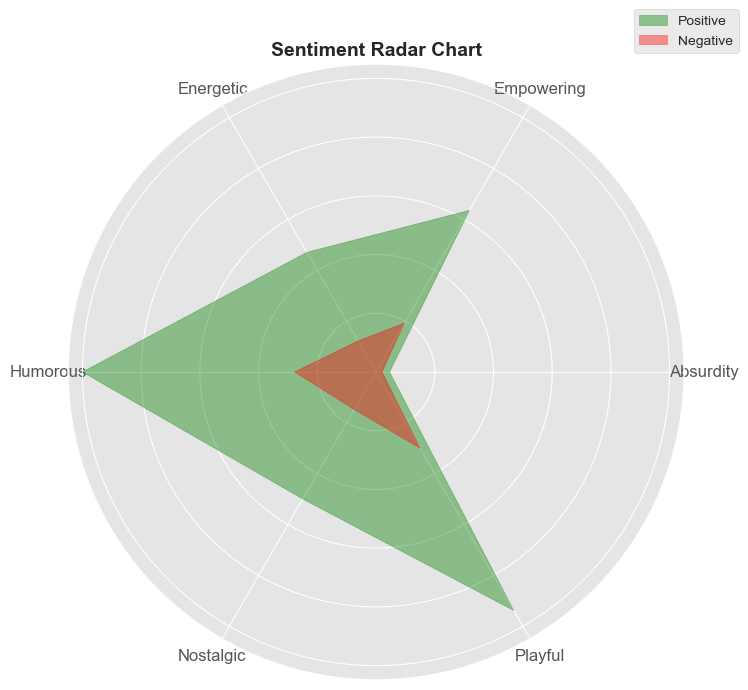

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Categories
categories = list(pos.keys())
num_vars = len(categories)

# Convert data into lists and normalize
pos_values = list(pos.values())
neg_values = list(neg.values())

# Normalize data
max_value = max(max(pos_values), max(neg_values), max(neutral_values))
pos_values = [v / max_value for v in pos_values]
neg_values = [v / max_value for v in neg_values]

# Compute angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Close the loop for radar chart
pos_values += pos_values[:1]
neg_values += neg_values[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


ax.fill(angles, pos_values, alpha=0.4, label='Positive', color='green')
ax.fill(angles, neg_values, alpha=0.4, label='Negative', color='red')
# Labels and aesthetics
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_title("Sentiment Radar Chart", fontsize=14, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

# Tweet sentiment analysis

In [74]:
import nltk
import re
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
import scattertext as st
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 
from tqdm.notebook import tqdm
import pandas as pd 
import numpy as np
from datetime import datetime
import dateutil.parser
import torch
import torch.nn as nn
import nltk
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Intializate our tools 
sns.set_style('darkgrid')

# For sentiment analysis 
sia = SIA() 

# To identify misspelled words
spell = SpellChecker() 

# To display plotly graphs 
pyo.init_notebook_mode() 

In [75]:
df_tweets.describe()

conversation_id            id     author_id  \
count     1.231470e+05  1.231470e+05  1.231470e+05   
mean      1.888427e+18  1.888785e+18  7.654190e+17   
std       1.034784e+16  8.619128e+12  7.544112e+17   
min       8.500303e+17  1.888649e+18  1.022100e+04   
25%       1.888780e+18  1.888786e+18  4.509769e+08   
50%       1.888787e+18  1.888788e+18  7.843641e+17   
75%       1.888788e+18  1.888788e+18  1.514084e+18   
max       1.888789e+18  1.888789e+18  1.888789e+18   

       public_metrics.retweet_count  public_metrics.reply_count  \
count                 123147.000000               123147.000000   
mean                    1268.394561                    1.047293   
std                     4697.470318                   29.927144   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        1.000000                    0.000000   
75%                      462.000000                    0.000000   
max                   115874.000000                 4332.000000   

       public_metrics.like_count  public_metrics.quote_count  \
count               123147.00000               123147.000000   
mean                    17.76213                    0.331823   
std                   1218.56010                   23.042475   
min                      0.00000                    0.000000   
25%                      0.00000                    0.000000   
50%                      0.00000                    0.000000   
75%                      0.00000                    0.000000   
max                 291881.00000                 2575.000000   

       public_metrics.bookmark_count  public_metrics.impression_count  \
count                  123147.000000                     1.231470e+05   
mean                        0.506232                     1.706360e+03   
std                        31.782714                     9.009004e+04   
min                         0.000000                     0.000000e+00   
25%                         0.000000                     0.000000e+00   
50%                         0.000000                     0.000000e+00   
75%                         0.000000                     1.700000e+01   
max                      8474.000000                     1.554963e+07   

       edit_controls.edits_remaining  in_reply_to_user_id  
count                  123147.000000         4.535700e+04  
mean                        4.996736         3.501602e+17  
std                         0.082722         6.207846e+17  
min                         0.000000         1.605000e+03  
25%                         5.000000         9.279316e+07  
50%                         5.000000         1.447153e+09  
75%                         5.000000         7.630946e+17  
max                         5.000000         1.888789e+18

In [76]:
df_tweets.shape

(123147, 36)

In [77]:
df_tweets['text'].apply(lambda x:len(str(x).split())).max()

111

# Tweets pre-processing

In [78]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [79]:

data = df_tweets.copy()
data['original_tweet'] = df_tweets['text']
data['datetime'] = data['created_at']
data['datetime'] = data.datetime.apply(lambda x: dateutil.parser.parse(x))
rt_mask = data.text.apply(lambda x: "RT @" in x)


# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# convert the 'date' column to datetime format and remove the timezone information
data['datetime'] = pd.to_datetime(data['datetime']).dt.tz_localize(None)

Top 10 most common words and their counts:
rt: 60944
#sblix: 21664
#sweepstakes: 15066
@nfl:: 12667
nfl: 11742
#playforultra: 11200
channel: 9799
tubi: 9624
📺:: 9569
app: 9405
fox: 9388
+: 9315
@michelobultra: 9188
📱:: 9122
#onlylays: 7710
super: 6741
.: 6285
bowl: 5936
#superbowllix: 5813
@tombrady: 5651
#thisbudsforyou: 4755
#superbowl: 4720
home: 4636
chance: 4620
@lays: 4452
#nfl: 4405
gatorade: 4202
@budweiserusa: 4142
bath: 4046
de: 3943
win: 3920
#doritoscrash: 3832
📢: 3824
another: 3654
us: 3589
:: 3331
-: 3183
@doritos: 3053
🔥: 3023
want: 3007
good: 3004
jesus: 2986
sirianni: 2976
game: 2854
ultra: 2787
please: 2751
&amp;: 2748
new: 2739
even: 2739
play: 2590


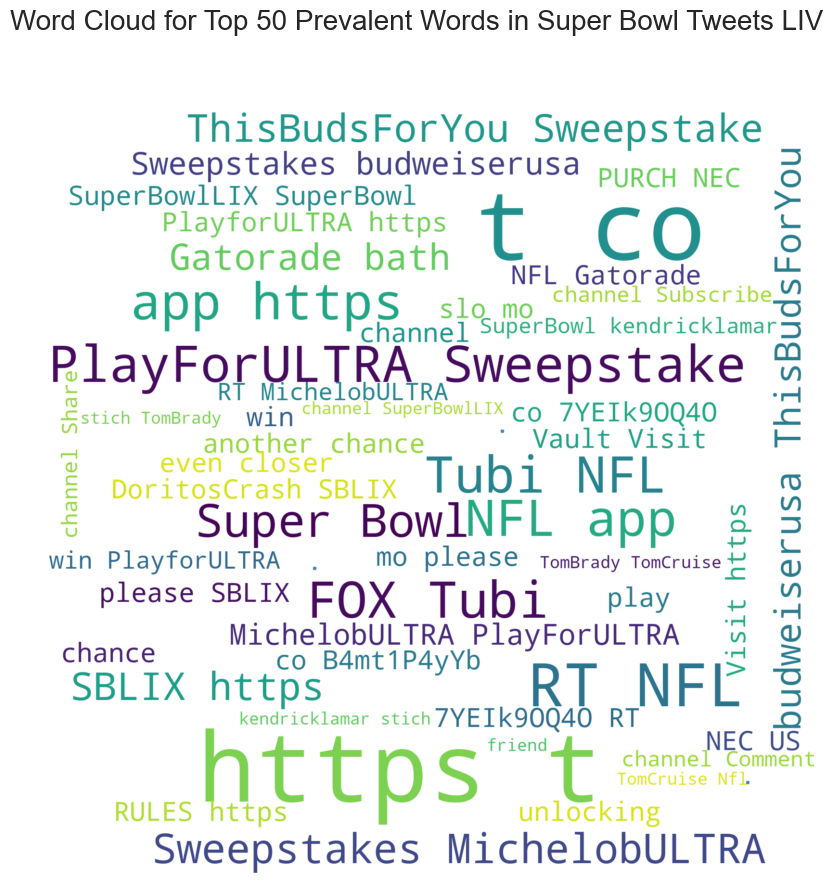

In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter

# Load Twitter bird silhouette (ensure the image is in the same directory or provide a full path)
twitter_mask = np.array(Image.open("x_logo.png"))  # Use a black-and-white Twitter bird image

# Combine all tweets' text into a single string
text = ' '.join(df_tweets['text'])

# Tokenize words and remove stopwords
filtered_words = [word.lower() for word in text.split() if word.lower() not in STOPWORDS]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(50)

# Print the top 10 words and their counts
print("Top 10 most common words and their counts:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Create the word cloud
word_cloud = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1
).generate(text)

# Plot the word cloud
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Top 50 Prevalent Words in Super Bowl Tweets LIV', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

In [81]:
from tqdm import tqdm
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tqdm.pandas()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def label_sentiment(x: float):
    if x <= -0.05: return 'negative'
    if x >= 0.05: return 'positive'
    return 'neutral'

# Feature Extraction
data['words'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in re.findall(r'\w+', x) if w.lower() not in stop_words])
data['words_count'] = data['words'].apply(len)
data['sentence_length'] = data['text'].apply(len)
data['hour'] = data['datetime'].dt.hour
data['date'] = data['datetime'].dt.date
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['day_of_week'] = data['datetime'].dt.dayofweek

# Extract Sentiment Values for each tweet (More Efficient)
data['sentiment'] = data['text'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment'].apply(label_sentiment)

data.head()

100%|████████████████████████████████| 123147/123147 [00:07<00:00, 15981.76it/s]


created_at  \
0  2025-02-10T03:16:57.000Z   
1  2025-02-10T03:16:49.000Z   
2  2025-02-10T03:16:48.000Z   
3  2025-02-10T03:16:46.000Z   
4  2025-02-10T03:16:46.000Z   

                                                text      conversation_id  \
0  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789225308409951   
1  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789188876894329   
2  THE ONLY GOAT. 🐐 @TomBrady #SuperBowl https://...  1888789186284503124   
3                               I love you @TomBrady  1888789179074793761   
4                               I love you @TomBrady  1888789179074793761   

  reply_settings   edit_history_tweet_ids lang  \
0       everyone  ['1888789225308409951']   es   
1       everyone  ['1888789188876894329']   es   
2       everyone  ['1888789186284503124']   en   
3       everyone  ['1888789179074793761']   en   
4       everyone  ['1888789179074793761']   en   

                                   referenced_tweets  possibly_sensitive  \
0  [{'type': 'retweeted', 'id': '1888782268186890...               False   
1  [{'type': 'retweeted', 'id': '1888782268186890...               False   
2                                                NaN               False   
3                                                NaN               False   
4                                                NaN               False   

                    id   author_id  ...            datetime  \
0  1888789225308409951   206743570  ... 2025-02-10 03:16:57   
1  1888789188876894329   282285390  ... 2025-02-10 03:16:49   
2  1888789186284503124   246885450  ... 2025-02-10 03:16:48   
3  1888789179074793761  1921582838  ... 2025-02-10 03:16:46   
4  1888789179074793761  1921582838  ... 2025-02-10 03:16:46   

                                               words  words_count  \
0  [rt, patriotslatam, sólo, hay, uno, como, él, ...           12   
1  [rt, patriotslatam, sólo, hay, uno, como, él, ...           12   
2  [goat, tombrady, superbowl, http, co, jdx3m0gh4v]            6   
3                                   [love, tombrady]            2   
4                                   [love, tombrady]            2   

   sentence_length  hour        date  month  year  day_of_week  sentiment  
0               82     3  2025-02-10      2  2025            0    neutral  
1               82     3  2025-02-10      2  2025            0    neutral  
2               61     3  2025-02-10      2  2025            0    neutral  
3               20     3  2025-02-10      2  2025            0   positive  
4               20     3  2025-02-10      2  2025            0   positive  

[5 rows x 47 columns]

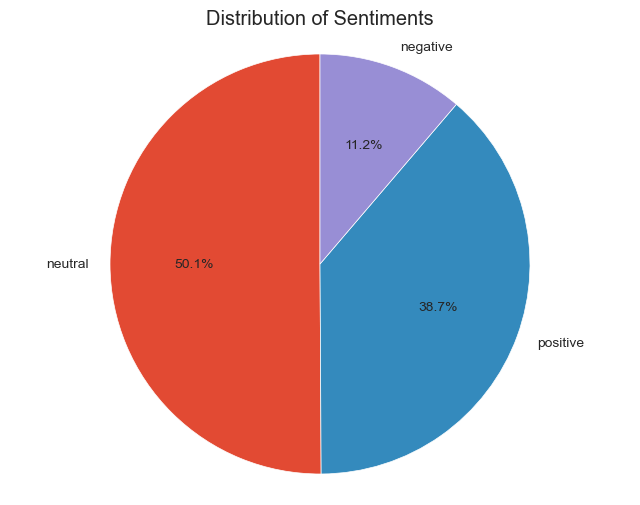

In [82]:
category_counts = data['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [83]:
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract hour and minute
data['hour'] = data['created_at'].dt.hour
data['minute'] = data['created_at'].dt.strftime('%H:%M')  # Format as HH:MM for plotting

# Filter tweets for the given time range (2:36 AM onward)
filtered_df = data[(data['hour'] >= 0) & (data['hour'] <= 4)]
filtered_df = filtered_df[filtered_df['minute'] >= '00:00']  # Filter for 2:36 AM onward

# Count tweets per minute for each sentiment
minute_sentiment_counts = (
    filtered_df.groupby(['minute', 'sentiment'])
    .size()
    .reset_index(name='tweet_count')
)

# Plot with all sentiment categories
fig = px.line(minute_sentiment_counts, x='minute', y='tweet_count', 
              color='sentiment', title='Tweets Per Minute (Starting from 5:00 PM)', 
              template='plotly_dark')

# Show the plot
fig.show()
fig.write_image("tweets_per_minute.png")  # Save as PNG

In [84]:
# find the most common locations
if 'location' in data.columns:
    top_location = data['location'].dropna().value_counts().head(10)  # Top 10 locations

    print("Top Tweeted Locations:\n", top_location)
else:
    print("No 'location' column found in the dataset.")

Top Tweeted Locations:
 location
United States       2553
St Louis, MO        2065
USA                 1007
Soldotna, AK         881
universe             865
Los Angeles, CA      684
Philadelphia, PA     679
SOLO JAWA BARAT      625
Georgia              542
Florida, USA         444
Name: count, dtype: int64


In [85]:
# List of U.S. state abbreviations and full names
us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota",
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}

# Reverse lookup for both abbreviation and full name matching
state_mapping = {**us_states, **{v: k for k, v in us_states.items()}}

# Function to extract state from location
def extract_state(location):
    if pd.isna(location):
        return None
    location = location.strip().title()  # Normalize capitalization
    for key, value in state_mapping.items():
        if re.search(rf"\b{re.escape(key)}\b", location, re.IGNORECASE):
            return value  # Return standard state abbreviation
    return None

# Apply function to dataset
if 'location' in data.columns:
    data['state'] = data['location'].apply(extract_state)

    # Count occurrences of each state
    state_counts = data['state'].dropna().value_counts()

    print("Top Tweeted States:\n", state_counts.head(10))
else:
    print("No 'location' column found in the dataset.")

Top Tweeted States:
 state
California      2304
Missouri        2295
Texas           1661
Pennsylvania    1526
New York        1330
TX              1313
Indiana         1255
Florida          945
FL               921
Alaska           913
Name: count, dtype: int64


In [86]:
import plotly.express as px

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


# Convert full state names to abbreviations
data["state_abbrev"] = data["state"].map(us_state_to_abbrev).fillna(data["state"])

# Aggregate tweet count per state
state_counts_df = data["state_abbrev"].value_counts().reset_index()
state_counts_df.columns = ["state", "tweet_count"]

# US State Choropleth Map
fig = px.choropleth(
    state_counts_df,
    locations="state",
    locationmode="USA-states",
    color="tweet_count",
    scope="usa",
    title="Tweet Activity Across US States",
    color_continuous_scale="viridis"
)

fig.show()

In [87]:
data.head(50)

created_at  \
0  2025-02-10 03:16:57+00:00   
1  2025-02-10 03:16:49+00:00   
2  2025-02-10 03:16:48+00:00   
3  2025-02-10 03:16:46+00:00   
4  2025-02-10 03:16:46+00:00   
5  2025-02-10 03:16:45+00:00   
6  2025-02-10 03:16:45+00:00   
7  2025-02-10 03:16:43+00:00   
8  2025-02-10 03:16:43+00:00   
9  2025-02-10 03:16:40+00:00   
10 2025-02-10 03:16:40+00:00   
11 2025-02-10 03:16:40+00:00   
12 2025-02-10 03:16:37+00:00   
13 2025-02-10 03:16:35+00:00   
14 2025-02-10 03:16:34+00:00   
15 2025-02-10 03:16:32+00:00   
16 2025-02-10 03:16:27+00:00   
17 2025-02-10 03:16:24+00:00   
18 2025-02-10 03:16:23+00:00   
19 2025-02-10 03:16:16+00:00   
20 2025-02-10 03:16:15+00:00   
21 2025-02-10 03:16:07+00:00   
22 2025-02-10 03:16:04+00:00   
23 2025-02-10 03:16:03+00:00   
24 2025-02-10 03:15:57+00:00   
25 2025-02-10 03:15:57+00:00   
26 2025-02-10 03:15:57+00:00   
27 2025-02-10 03:15:53+00:00   
28 2025-02-10 03:15:42+00:00   
29 2025-02-10 03:15:38+00:00   
30 2025-02-10 03:15:37+00:00   
31 2025-02-10 03:15:37+00:00   
32 2025-02-10 03:15:37+00:00   
33 2025-02-10 03:15:37+00:00   
34 2025-02-10 03:15:37+00:00   
35 2025-02-10 03:15:37+00:00   
36 2025-02-10 03:15:37+00:00   
37 2025-02-10 03:15:37+00:00   
38 2025-02-10 03:15:37+00:00   
39 2025-02-10 03:15:37+00:00   
40 2025-02-10 03:15:37+00:00   
41 2025-02-10 03:15:37+00:00   
42 2025-02-10 03:15:37+00:00   
43 2025-02-10 03:15:37+00:00   
44 2025-02-10 03:15:30+00:00   
45 2025-02-10 03:15:26+00:00   
46 2025-02-10 03:15:24+00:00   
47 2025-02-10 03:15:23+00:00   
48 2025-02-10 03:15:21+00:00   
49 2025-02-10 03:15:17+00:00   

                                                 text      conversation_id  \
0   RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789225308409951   
1   RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789188876894329   
2   THE ONLY GOAT. 🐐 @TomBrady #SuperBowl https://...  1888789186284503124   
3                                I love you @TomBrady  1888789179074793761   
4                                I love you @TomBrady  1888789179074793761   
5   RT @billboard: Ben Affleck Brings Back the Dun...  1888789174926319942   
6   RT @NFLFilms: .@TomBrady taking a nap less tha...  1888789173286343034   
7   Not everyone can be this @TomBrady you fucking...  1888789164579328429   
8   Not everyone can be this @TomBrady you fucking...  1888789164579328429   
9   RT @outbreakupdates: About two million baked g...  1888789153451491386   
10  Remontar un super bowl solo es para el más gra...  1888789150611956162   
11  Remontar un super bowl solo es para el más gra...  1888789150611956162   
12  RT @NFLMAVERICK: Chiefs are 0-2 when Brady is ...  1888789138268164382   
13  #TaylorSwift #Kendrick #SBLIX #Philly #TomBrad...  1888789120622940298   
14  #SuperBowl2025 🏈 | ¡Qué elegancia la de Franci...  1888789127430123999   
15  This is the 3rd greatest day of my life. 1. Mi...  1888789117460230444   
16  RT @DonnieWahlberg: So fun to be a part of thi...  1888789098732663064   
17  Tom brady through 5 Super Bowls: 3-2 record an...  1888789083675037979   
18  RT @NFLonFOX: Here come our guys @kevinburkhar...  1888789079287804270   
19  RT @SkapAttack: This was never feasibly a conv...  1888789050087112993   
20  RT @NFL: From winning Super Bowls to calling t...  1888789048694567026   
21  @TomBrady certainly isn't the GOAT of announci...  1888789014406111361   
22                @FoxNews Dunkin needs to drop him 🤣  1888776178086867125   
23  dunkin ~ promo spesial sampai 28 februari http...  1888788995989254257   
24  @overtime Ong stop disrespecting the #GOAT #TB...  1888780620144234624   
25  RT @kendallhosseini: the chiefs are getting be...  1888788972186349752   
26  @AlvaroNFLMartin @TomBrady Cuál discusión? htt...  1888752441417457715   
27  RT @OldSchoolBoston: "Old School" Dunkin Donut...  1888788954499170315   
28  @HedgehogOptions @NFL @TomBrady Product of Car...  1888785318050247023   
29  RT @DonnieWahlberg: So fun to be a part o

In [88]:
df_pa_mo = data[data['state_abbrev'].isin(['PA', 'MO'])]

# Create a pivot table to get sentiment counts for each state
sentiment_counts = df_pa_mo.groupby(['state_abbrev', 'sentiment']).size().unstack(fill_value=0)

mo_total, pa_total = sentiment_counts.sum(axis=1)

print(sentiment_counts.loc['MO', 'negative'])
print(sentiment_counts.loc['PA', 'negative'])

mo_positive_ratio = sentiment_counts.loc['MO', 'positive'] / mo_total
pa_positive_ratio = sentiment_counts.loc['PA', 'positive'] / pa_total

mo_negative_ratio = sentiment_counts.loc['MO', 'negative'] / mo_total
pa_negative_ratio = sentiment_counts.loc['PA', 'negative'] / pa_total

mo_neutral_ratio = sentiment_counts.loc['MO', 'neutral'] / mo_total
pa_neutral_ratio = sentiment_counts.loc['PA', 'neutral'] / pa_total

sentiment_counts.head()

26
139


sentiment     negative  neutral  positive
state_abbrev                             
MO                  26      233      2172
PA                 139     1102       613

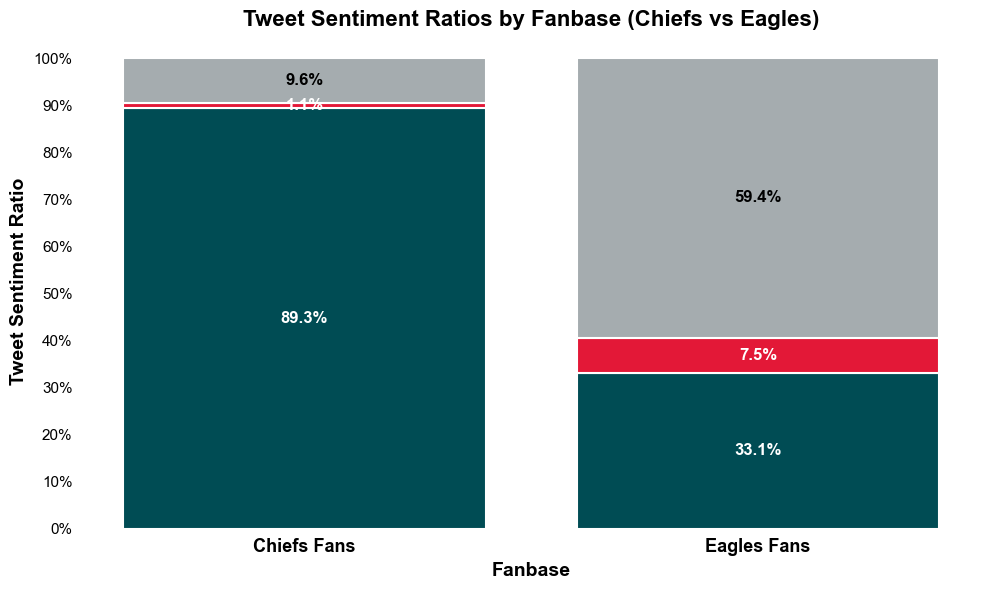

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Data
state_labels = ['Chiefs Fans', 'Eagles Fans']
positive = [mo_positive_ratio, pa_positive_ratio]
negative = [mo_negative_ratio, pa_negative_ratio]
neutral = [mo_neutral_ratio, pa_neutral_ratio]

# Use a built-in Matplotlib style that works
plt.style.use('ggplot')

# Create figure with transparent background
fig, ax = plt.subplots(figsize=(10, 6), facecolor="none")
ax.set_facecolor("none")

# Define colors (Eagles Midnight Green for positive, Chiefs Red for negative, Silver for neutral)
colors = ['#004C54', '#E31837', '#A5ACAF']  # Midnight Green, Chiefs Red, Silver

# Plot the stacked bars
ax.bar(state_labels, positive, color=colors[0], label='Positive', edgecolor='white', linewidth=1.5)
ax.bar(state_labels, negative, bottom=positive, color=colors[1], label='Negative', edgecolor='white', linewidth=1.5)
ax.bar(state_labels, neutral, bottom=[i + j for i, j in zip(positive, negative)], color=colors[2], label='Neutral', edgecolor='white', linewidth=1.5)

# Add percentage text labels on top of bars
for i, state in enumerate(state_labels):
    ax.text(i, positive[i] / 2, f'{positive[i]*100:.1f}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=12)
    ax.text(i, positive[i] + negative[i] / 2, f'{negative[i]*100:.1f}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=12)
    ax.text(i, positive[i] + negative[i] + neutral[i] / 2, f'{neutral[i]*100:.1f}%', ha='center', va='center', 
            color='black', fontweight='bold', fontsize=12)

# Set labels and title with improved font styling
ax.set_xlabel('Fanbase', fontsize=14, fontweight='bold', color="black")
ax.set_ylabel('Tweet Sentiment Ratio', fontsize=14, fontweight='bold', color="black")
ax.set_title('Tweet Sentiment Ratios by Fanbase (Chiefs vs Eagles)', fontsize=16, fontweight='bold', color="black")

# Customize ticks and gridlines
ax.set_xticks(range(len(state_labels)))
ax.set_xticklabels(state_labels, fontsize=13, fontweight="bold", color="black")
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{int(y*100)}%' for y in np.arange(0, 1.1, 0.1)], fontsize=11, color="black")
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Add legend with cleaner styling

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [90]:
# Assuming data is your original DataFrame
df_state_sentiment = data.groupby(['state_abbrev', 'sentiment']).size().unstack(fill_value=0)

# Calculate the total number of tweets per state
state_totals = df_state_sentiment.sum(axis=1)

# Calculate the positive, negative, and neutral ratios for each state
state_positive_ratio = df_state_sentiment['positive'] / state_totals
state_negative_ratio = df_state_sentiment['negative'] / state_totals
state_neutral_ratio = df_state_sentiment['neutral'] / state_totals

# Combine the results into a single DataFrame
sentiment_ratios = pd.DataFrame({
    'positive_ratio': state_positive_ratio,
    'negative_ratio': state_negative_ratio,
    'neutral_ratio': state_neutral_ratio
})

sentiment_ratios.head()

positive_ratio  negative_ratio  neutral_ratio
state_abbrev                                               
AK                  0.327568        0.150270       0.522162
AL                  0.374707        0.058548       0.566745
AR                  0.337423        0.055215       0.607362
AZ                  0.376130        0.137432       0.486438
CA                  0.434054        0.100935       0.465011

In [91]:
# Make sure the state_abbrev is part of the DataFrame and renamed correctly
sentiment_ratios = sentiment_ratios.reset_index()  # Reset index to get 'state_abbrev' as a column
sentiment_ratios = sentiment_ratios.rename(columns={'state_abbrev': 'state'})  # Rename the column to 'state'

sentiment_ratios['positive_ratio_log'] = np.log(sentiment_ratios['positive_ratio'] + 1e-6)
sentiment_ratios['negative_ratio_log'] = np.log(sentiment_ratios['negative_ratio'] + 1e-6)
sentiment_ratios['neutral_ratio_log'] = np.log(sentiment_ratios['neutral_ratio'] + 1e-6)

# US State Choropleth Map
fig = px.choropleth(
    sentiment_ratios,
    locations="state",  # Use the 'state' column for locations
    locationmode="USA-states",
    color="positive_ratio_log",  # Use the positive ratio for coloring
    scope="usa",
    title="Positive Sentiment Ratio Across US States",
    color_continuous_scale="Viridis"
)

fig.show()

Most common word: 'another' (appeared 2015 times)


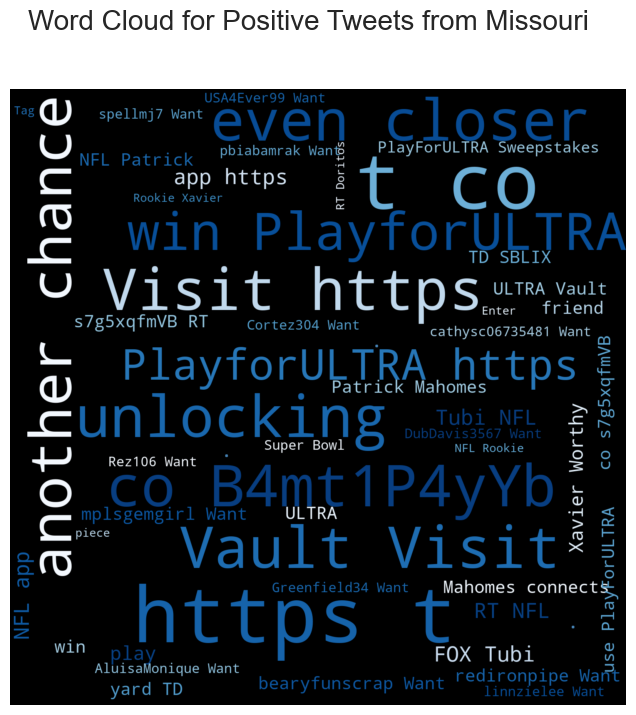

In [92]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Filter the tweets to only include those from Missouri and labeled as 'positive'
missouri_positive_tweets = data[(data['state_abbrev'] == 'MO') & (data['sentiment'] == 'positive')]

# Combine all positive tweets' text into a single string
text = ' '.join(missouri_positive_tweets['text'])

# Tokenize words and remove stopwords
words = text.split()
filtered_words = [word.lower() for word in words if word.lower() not in STOPWORDS]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the most common word
most_common_word, most_common_count = word_counts.most_common(1)[0]

# Create the word cloud
word_cloud = WordCloud(
    background_color='black',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1,
    colormap='Blues'
).generate(text)

# Print the most common word
print(f"Most common word: '{most_common_word}' (appeared {most_common_count} times)")

# Plot the word cloud
fig = plt.figure(1, figsize=(8, 8))
plt.axis('off')
fig.suptitle('Word Cloud for Positive Tweets from Missouri', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

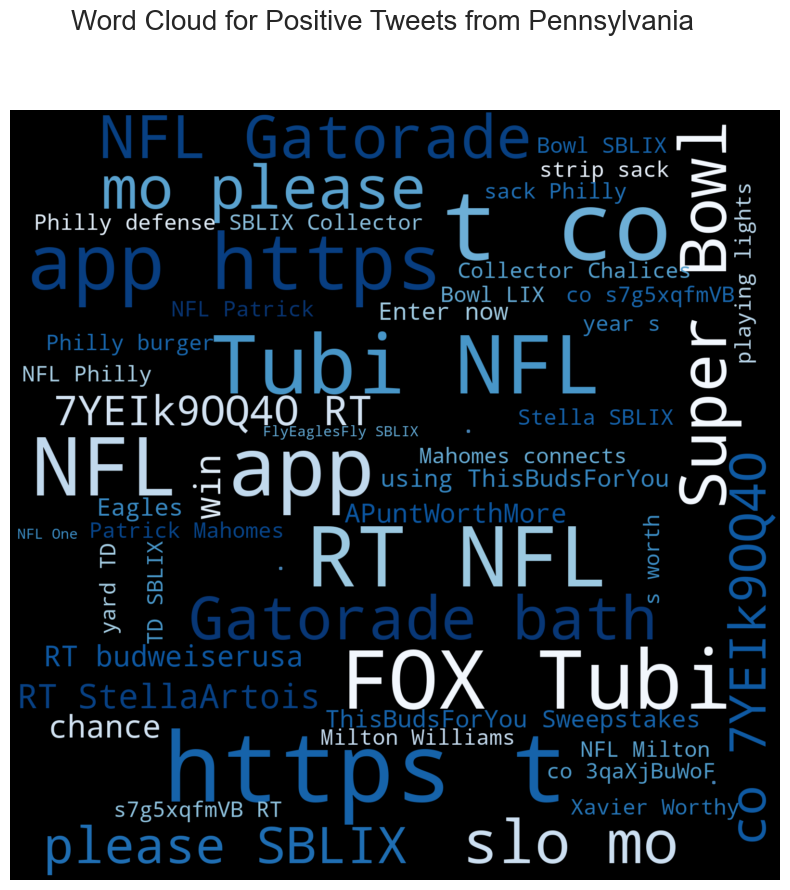

In [93]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the tweets to only include those from Missouri and labeled as 'positive'
missouri_positive_tweets = data[(data['state_abbrev'] == 'PA') & (data['sentiment'] == 'positive')]

# Combine all positive tweets' text into a single string
text = ' '.join(missouri_positive_tweets['text'])

# Create the word cloud
word_cloud = WordCloud(
    background_color='Black',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1,
    colormap="Blues"
).generate(text)

# Plot the word cloud
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Positive Tweets from Pennsylvania', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

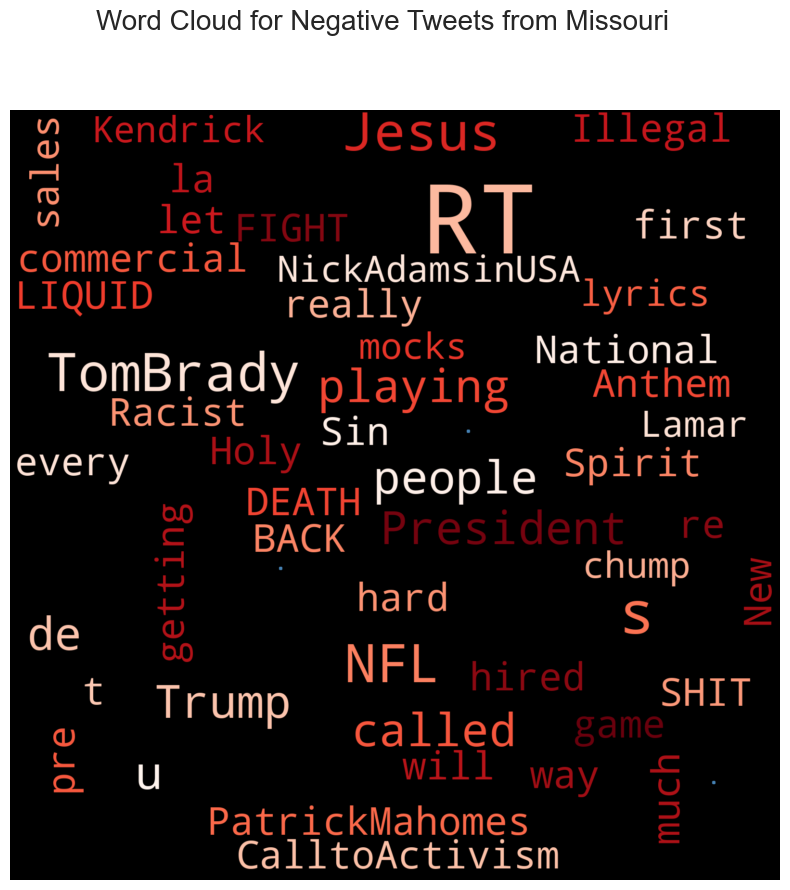

In [94]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the tweets to only include those from Missouri and labeled as 'positive'
missouri_positive_tweets = data[(data['state_abbrev'] == 'MO') & (data['sentiment'] == 'negative')]

# Combine all positive tweets' text into a single string
text = ' '.join(missouri_positive_tweets['text'])

# Create the word cloud
word_cloud = WordCloud(
    background_color='black',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1,
    colormap='Reds'  # Set the color map to red shades
).generate(text)

# Plot the word cloud
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Negative Tweets from Missouri', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

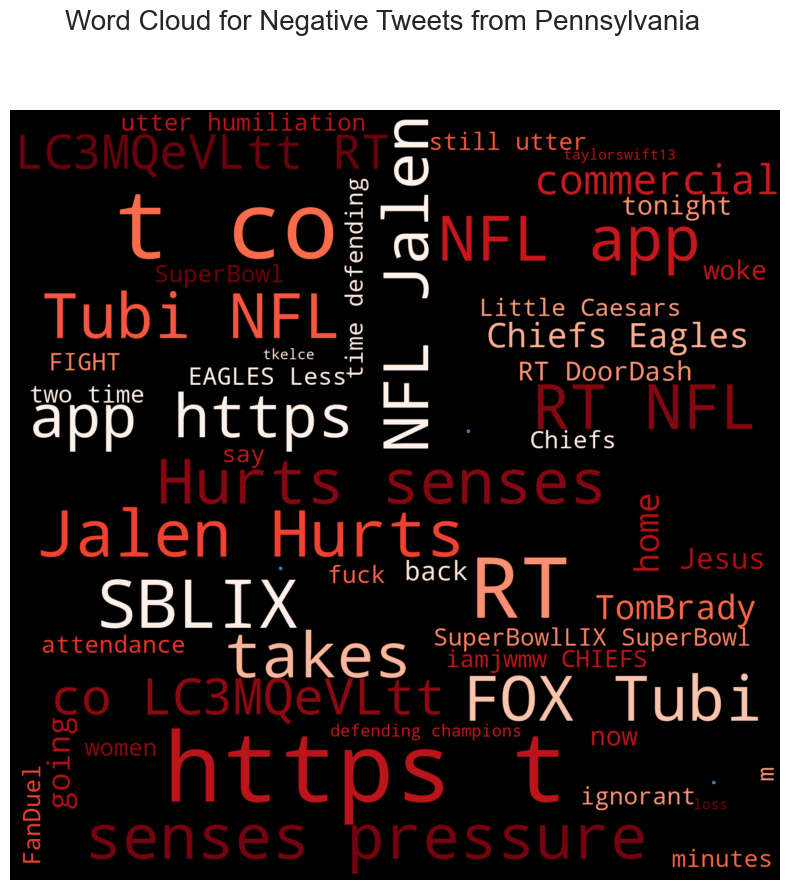

In [95]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the tweets to only include those from Missouri and labeled as 'positive'
missouri_positive_tweets = data[(data['state_abbrev'] == 'PA') & (data['sentiment'] == 'negative')]

# Combine all positive tweets' text into a single string
text = ' '.join(missouri_positive_tweets['text'])

# Create the word cloud
word_cloud = WordCloud(
    background_color='black',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',  # Optional outline
    contour_width=2,
    random_state=1,
    colormap='Reds'  # Set the color map to red shades

).generate(text)

# Plot the word cloud
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Negative Tweets from Pennsylvania', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

In [96]:
data.head()

created_at  \
0 2025-02-10 03:16:57+00:00   
1 2025-02-10 03:16:49+00:00   
2 2025-02-10 03:16:48+00:00   
3 2025-02-10 03:16:46+00:00   
4 2025-02-10 03:16:46+00:00   

                                                text      conversation_id  \
0  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789225308409951   
1  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...  1888789188876894329   
2  THE ONLY GOAT. 🐐 @TomBrady #SuperBowl https://...  1888789186284503124   
3                               I love you @TomBrady  1888789179074793761   
4                               I love you @TomBrady  1888789179074793761   

  reply_settings   edit_history_tweet_ids lang  \
0       everyone  ['1888789225308409951']   es   
1       everyone  ['1888789188876894329']   es   
2       everyone  ['1888789186284503124']   en   
3       everyone  ['1888789179074793761']   en   
4       everyone  ['1888789179074793761']   en   

                                   referenced_tweets  possibly_sensitive  \
0  [{'type': 'retweeted', 'id': '1888782268186890...               False   
1  [{'type': 'retweeted', 'id': '1888782268186890...               False   
2                                                NaN               False   
3                                                NaN               False   
4                                                NaN               False   

                    id   author_id  ... sentence_length hour        date  \
0  1888789225308409951   206743570  ...              82    3  2025-02-10   
1  1888789188876894329   282285390  ...              82    3  2025-02-10   
2  1888789186284503124   246885450  ...              61    3  2025-02-10   
3  1888789179074793761  1921582838  ...              20    3  2025-02-10   
4  1888789179074793761  1921582838  ...              20    3  2025-02-10   

   month  year  day_of_week  sentiment  minute     state  state_abbrev  
0      2  2025            0    neutral   03:16      None          None  
1      2  2025            0    neutral   03:16      None          None  
2      2  2025            0    neutral   03:16      None          None  
3      2  2025            0   positive   03:16  Michigan            MI  
4      2  2025            0   positive   03:16  Michigan            MI  

[5 rows x 50 columns]

In [97]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Selecting only numeric columns
data_no_month_year = data.drop(columns=['month', 'hour', 'words_count', 'errors_count', 'sentence_length', 'day_of_week'])
numeric_cols = data_no_month_year.select_dtypes(include=['number'])
numeric_cols = numeric_cols.rename(columns={
    'public_metrics.like_count': 'Likes',
    'public_metrics.quote_count': 'Quotes',
    'public_metrics.bookmark_count': 'Bookmarks',
    'public_metrics.reply_count': 'Replies',
    'public_metrics.impression_count': 'Impressions'
})

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a graph
G = nx.Graph()
threshold = 0.5  # Only add edges for strong correlations

# Add nodes and edges with weights
edges = []
edge_widths = []

for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.loc[col1, col2]) > threshold:
            corr_value = correlation_matrix.loc[col1, col2]
            G.add_edge(col1, col2, weight=corr_value)

            # Store edge properties
            edges.append((col1, col2))
            edge_widths.append(abs(corr_value) * 5)  # Scale edge thickness

# Layout for better visualization
pos = nx.circular_layout(G)  # Change to nx.spring_layout(G) for organic shape
plt.figure(figsize=(1, 1), facecolor="royalblue")  # Set figure background color to blue

# Create figure with Deep Navy Blue background
fig, ax = plt.subplots(figsize=(5.8,5.8), facecolor="#A5ACAF")
ax.set_facecolor("#A5ACAF")  # Set plot background color

# Remove grid and axes
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Draw nodes (Midnight Green #004C54)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="#004C54", edgecolors="#3AB09E")

# Draw edges (Chiefs Red #E31837)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, edge_color="#E31837")

# Draw labels (Black #000000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="white")

# Draw edge labels (correlation values) in Black
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color="#000000")

# Add title (Black #000000)
plt.title("Correlation Network Graph of Engagement Metrics", fontsize=12, fontweight="bold", pad=20, color="#000000")

# Show the plot
plt.show()

KeyError: "['errors_count'] not found in axis"

In [ ]:
engagement_metrics = data.groupby("brand")[["public_metrics.like_count",
                                                      "public_metrics.retweet_count",
                                                      "public_metrics.reply_count", "public_metrics.quote_count", "public_metrics.bookmark_count"]].sum().reset_index()

engagement_metrics.columns = ["Brand", "Total Likes", "Total Retweets", "Total Replies", "Total Quotes", "Total bookmarks"]
print(engagement_metrics['Total Likes'].sum() + engagement_metrics['Total Replies'].sum() + engagement_metrics['Total Retweets'].sum() + engagement_metrics['Total Quotes'].sum()+ engagement_metrics['Total bookmarks'].sum())

In [98]:
if 'brand' in data.columns:
    brand_mentions = data['brand'].dropna().value_counts()

    print("Total tweets per Brand:\n", brand_mentions)
else:
    print("No 'brand' column found in the dataset.")

Total tweets per Brand:
 brand
TurboTax                13949
Bud Light               12622
Dunkin'                 10791
Disney                  10397
Lays                     9864
NFL                      9068
Google                   7557
Michelob Ultra           7360
Homes.com                7091
hegetsus                 4735
Doritos                  3943
Tubi                     3829
Nike                     2645
Hims & Hers              2043
DoorDash                 1971
Little Caesars           1580
Fetch                    1423
Meta                     1174
FanDuel                  1161
openai                   1159
Instacart                 945
Coffee mate               660
Budweiser                 549
Taco Bell                 526
Ram                       521
Novartis                  454
Dove                      441
Poppi                     419
Jeep                      410
MSC Cruises               325
Stella Artois             222
Ritz                      216
RedBull  

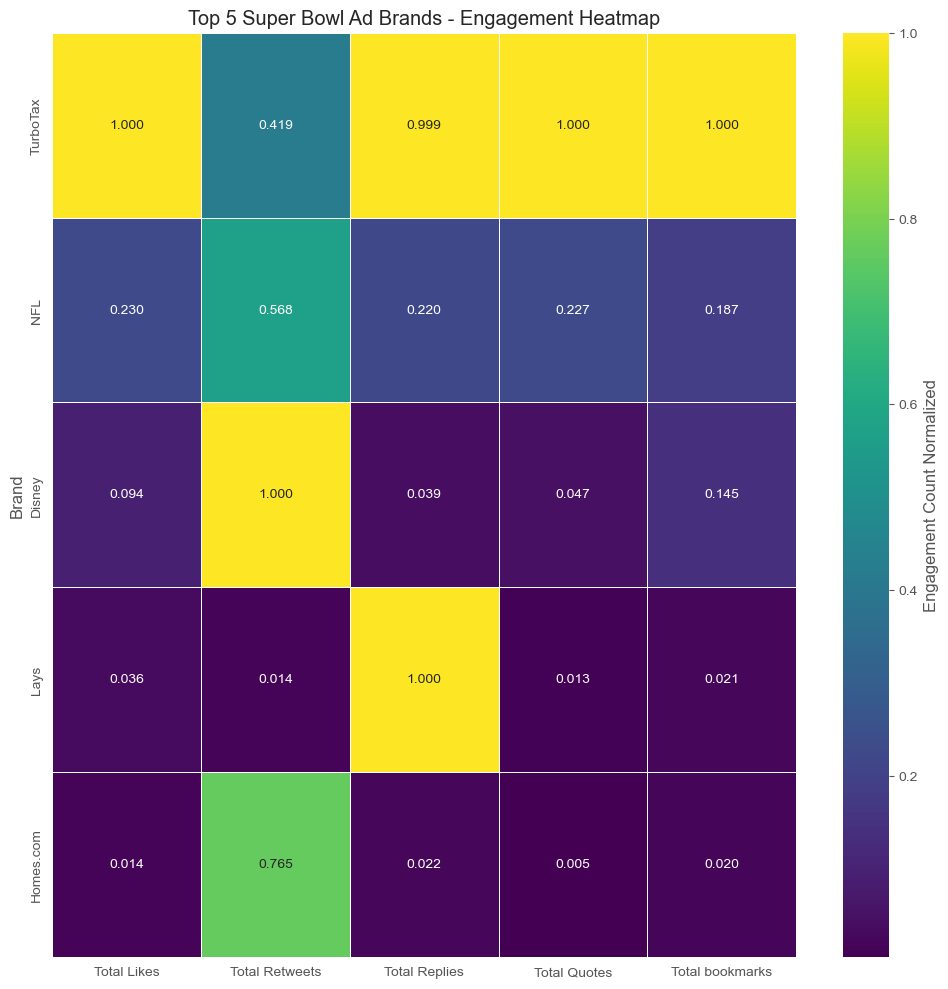

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 12))

# Set index and normalize the engagement metrics
likes_metrics = engagement_metrics.set_index('Brand')[['Total Likes', 'Total Retweets', 'Total Replies', 'Total Quotes', 'Total bookmarks']]
likes_metrics = likes_metrics.div(likes_metrics.max())  # Normalize all columns by their max values

# Compute the total sum of normalized engagement for each brand
likes_metrics['Total Engagement'] = likes_metrics.sum(axis=1)

# Select the top 5 brands with the highest total engagement
top_5_brands = likes_metrics.nlargest(5, 'Total Engagement').drop(columns=['Total Engagement'])

# Create heatmap for the top 5 brands
sns.heatmap(top_5_brands, 
            cmap='viridis',
            annot=True,
            linewidths=0.5,
            fmt='.3f',
            cbar_kws={'label': 'Engagement Count Normalized'})

# Set title
plt.title("Top 5 Super Bowl Ad Brands - Engagement Heatmap")

# Show plot
plt.show()

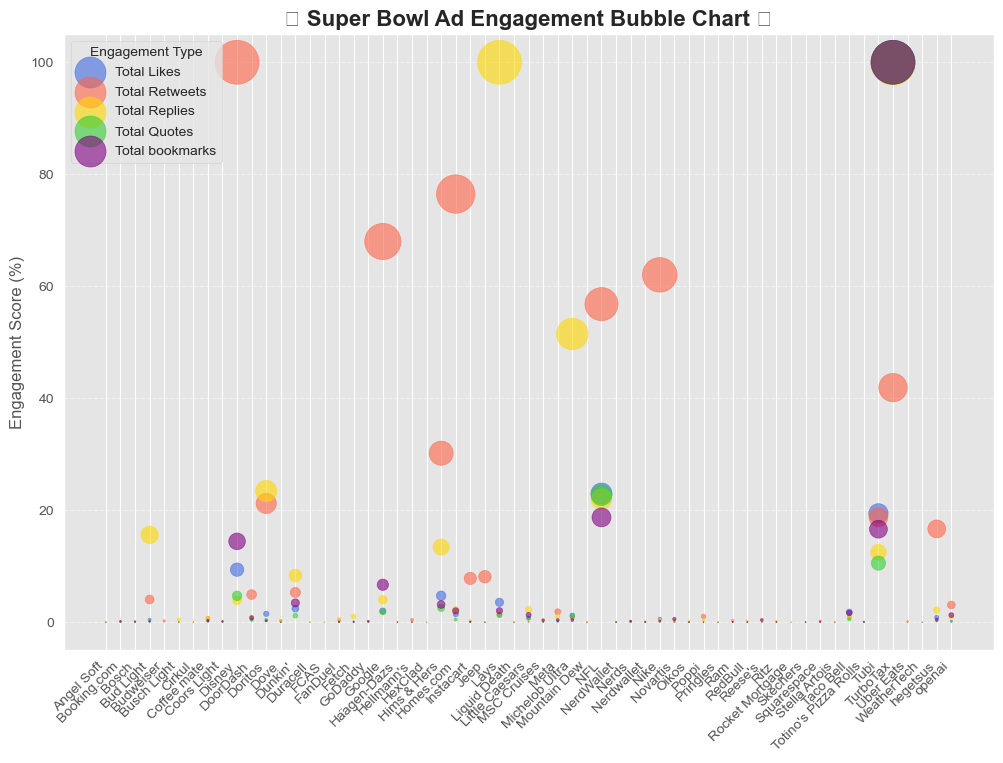

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize data for better scaling
likes_metrics = engagement_metrics.set_index('Brand')[['Total Likes','Total Retweets', 'Total Replies', 'Total Quotes', 'Total bookmarks']]
likes_metrics = likes_metrics.div(likes_metrics.max())  # Normalize all values between 0-1

# Create a figure
plt.figure(figsize=(12, 8))

# Assign colors to engagement types
colors = ["royalblue", "tomato", "gold", "limegreen", "purple"]
metrics = likes_metrics.columns

# Scatter plot (Bubble chart)
for i, metric in enumerate(metrics):
    plt.scatter(likes_metrics.index, likes_metrics[metric] * 100, 
                s=likes_metrics[metric] * 1000,  # Bubble size
                alpha=0.6, label=metric, color=colors[i])

# Labels & Aesthetics
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylabel("Engagement Score (%)", fontsize=12)
plt.title("🔥 Super Bowl Ad Engagement Bubble Chart 🔥", fontsize=16, fontweight="bold")
plt.legend(title="Engagement Type")
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Show the plot
plt.show()

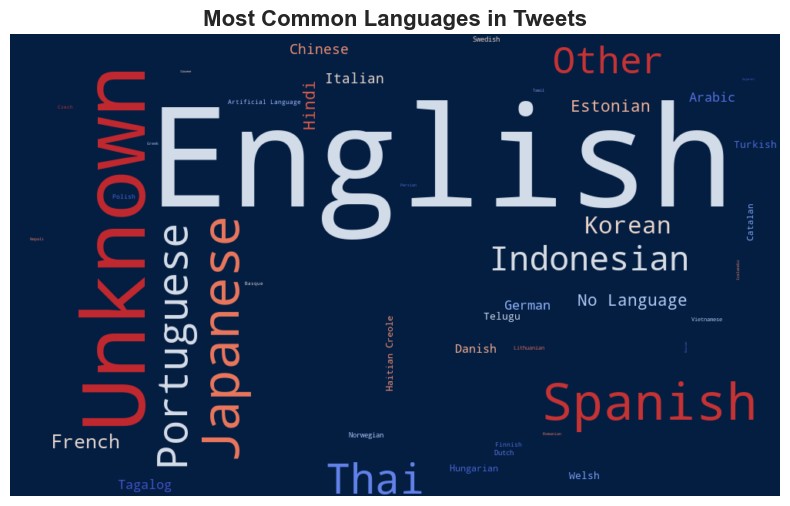

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Language mapping
lang_map = {
    'es': 'Spanish', 'en': 'English', 'qme': 'Unknown', 'in': 'Indonesian', 'nl': 'Dutch',
    'pt': 'Portuguese', 'und': 'Unknown', 'qam': 'Other', 'zxx': 'No Language', 'et': 'Estonian',
    'zh': 'Chinese', 'fr': 'French', 'tl': 'Tagalog', 'ht': 'Haitian Creole', 'de': 'German',
    'da': 'Danish', 'ja': 'Japanese', 'no': 'Norwegian', 'ca': 'Catalan', 'qht': 'Other',
    'ar': 'Arabic', 'qst': 'Other', 'el': 'Greek', 'ru': 'Russian', 'is': 'Icelandic',
    'vi': 'Vietnamese', 'lt': 'Lithuanian', 'art': 'Artificial Language', 'sv': 'Swedish',
    'hi': 'Hindi', 'th': 'Thai', 'ko': 'Korean', 'te': 'Telugu', 'it': 'Italian', 'lv': 'Latvian',
    'gu': 'Gujarati', 'ta': 'Tamil', 'cy': 'Welsh', 'fi': 'Finnish', 'tr': 'Turkish', 'eu': 'Basque',
    'pl': 'Polish', 'iw': 'Hebrew', 'ro': 'Romanian', 'sl': 'Slovene', 'hu': 'Hungarian',
    'cs': 'Czech', 'mr': 'Marathi', 'ne': 'Nepali', 'fa': 'Persian', 'bn': 'Bengali',
    'ml': 'Malayalam', 'ps': 'Pashto', 'ur': 'Urdu', 'qct': 'Other'
}

# Load dataset

# Map abbreviations to full language names
data['lang_full'] = data['lang'].map(lang_map)

# Count occurrences of each language
lang_counts = data['lang_full'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color="#041E42", colormap="coolwarm")
wordcloud.generate_from_frequencies(lang_counts)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Languages in Tweets", fontsize=16, fontweight="bold")
plt.show()

lang_full
Urdu                       1
Malayalam                  1
Bengali                    1
Hebrew                     1
Pashto                     1
Marathi                    2
Latvian                    2
Gujarati                   3
Slovene                    4
Russian                    4
Persian                    6
Nepali                     6
Greek                      6
Romanian                   7
Tamil                      8
Icelandic                  8
Basque                    10
Czech                     10
Lithuanian                13
Vietnamese                15
Polish                    22
Finnish                   23
Artificial Language       23
Norwegian                 28
Swedish                   28
Dutch                     31
Catalan                   56
Haitian Creole            62
Hungarian                 64
Welsh                     81
Telugu                    82
Turkish                   84
Danish                   111
German                   138
Arab

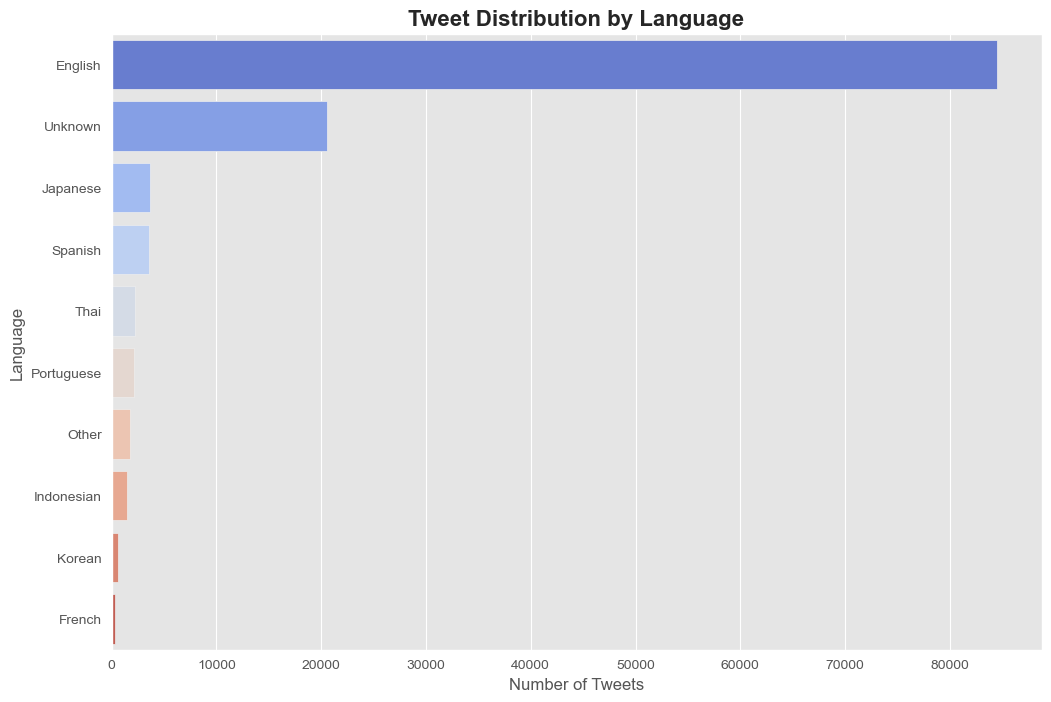

In [102]:
import seaborn as sns

# Sort language counts for better visualization
lang_counts_sorted = lang_counts.sort_values(ascending=True)
top_langs = lang_counts.head(10)
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_langs.values, y=top_langs.index, palette="coolwarm")

# Labels & title
plt.xlabel("Number of Tweets", fontsize=12)
plt.ylabel("Language", fontsize=12)
plt.title("Tweet Distribution by Language", fontsize=16, fontweight="bold")

# Show the plot
print(lang_counts_sorted)

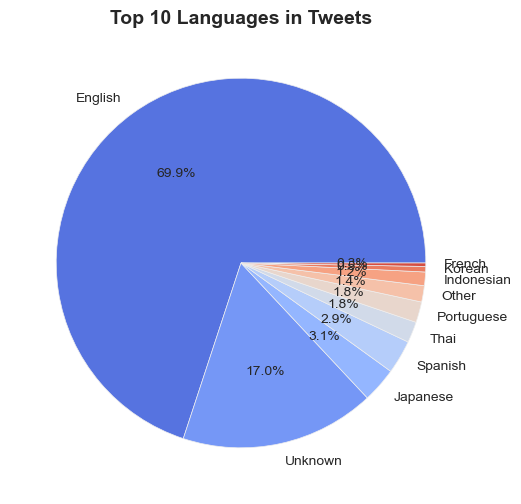

In [103]:
# Limit to top 10 languages for clarity
top_langs = lang_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.pie(top_langs, labels=top_langs.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(top_langs)))

# Title
plt.title("Top 10 Languages in Tweets", fontsize=14, fontweight="bold")

# Show
plt.show()

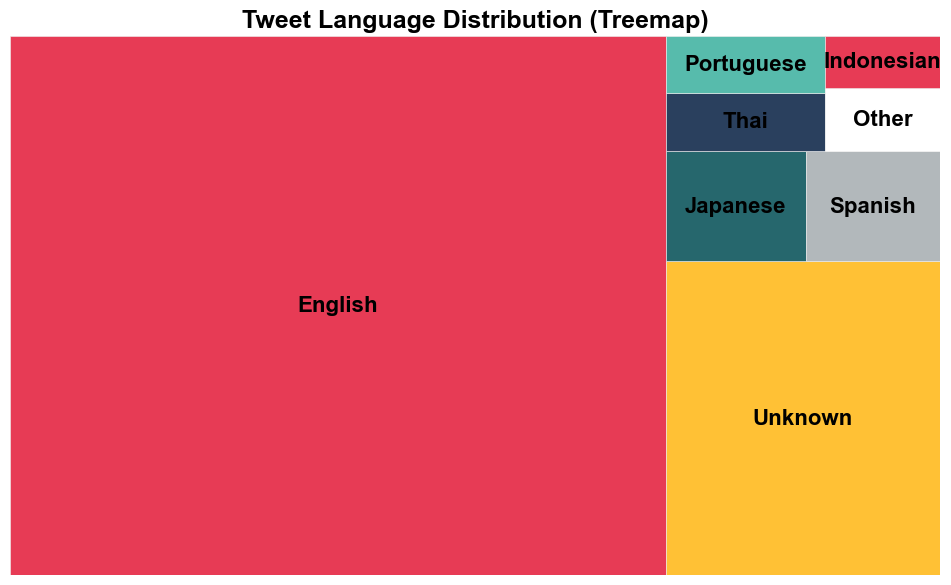

In [104]:
import squarify
import matplotlib.pyplot as plt

# Eagles & Chiefs color palette
team_colors = [
    "#E31837",
    "#FFB612",
    "#004C54",  # Eagles Midnight Green
    "#A5ACAF",  # Eagles Silver/Gray
    "#041E42",  # March Madness Navy Blue
    "#3AB09E",  # Mint Green for contrast
    "#FFFFFF"   # White for balance
]

# Limit to top 8 languages
top_langs = lang_counts.head(8)

# Plot
plt.figure(figsize=(12, 7))
squarify.plot(sizes=top_langs.values, label=top_langs.index, alpha=0.85, 
              color=team_colors[:len(top_langs)], text_kwargs={'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Title
plt.title("Tweet Language Distribution (Treemap)", fontsize=18, fontweight="bold", color="black")

# Remove axes for a cleaner look
plt.axis("off")

# Show plot
plt.show()

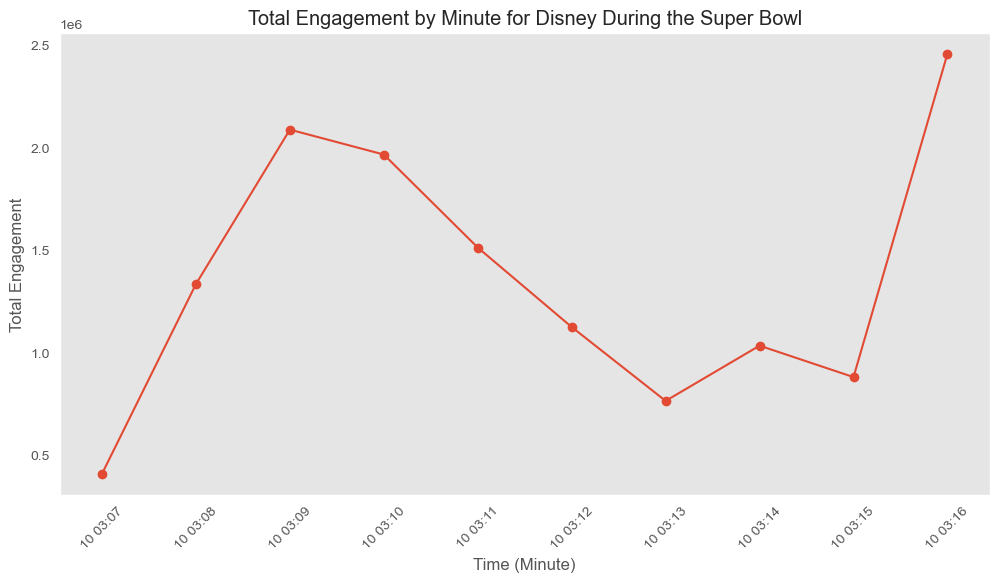

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'created_at' to datetime format and round to the nearest minute
data['created_at'] = pd.to_datetime(data['created_at'])
data['minute'] = data['created_at'].dt.floor('T')  # 'T' means minute-level rounding

# Compute total engagement
engagement_columns = [
    'public_metrics.retweet_count', 'public_metrics.reply_count', 
    'public_metrics.like_count', 'public_metrics.quote_count',
    'public_metrics.bookmark_count'
]
data['total_engagement'] = data[engagement_columns].sum(axis=1) + 1  # +1 to count the tweet itself

# Filter for brand 'Disney'
data_filtered = data[data['brand'] == 'TurboTax']

# Group by minute and sum engagement
enagement_by_minute = data_filtered.groupby('minute')['total_engagement'].sum().reset_index()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(enagement_by_minute['minute'], enagement_by_minute['total_engagement'], marker='o', linestyle='-')
plt.xlabel('Time (Minute)')
plt.ylabel('Total Engagement')
plt.title('Total Engagement by Minute for Disney During the Super Bowl')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [106]:
from textblob import TextBlob

# List of celebrities from the ads
celebrities = [
    "Ben Affleck", "Jennifer Lopez", "Matt Damon", "Tom Brady", "Chris Pratt",
    "Lionel Messi", "Peyton Manning", "David Beckham", "Aubrey Plaza", "Ice Spice",
    "Sydney Sweeney", "Glen Powell", "Tina Fey", "Tim Meadows", "Jimmy Fallon",
    "Ana de Armas", "Cardi B", "Kate McKinnon", "Harrison Ford", "Alfonso Ribeiro",
    "Ludacris", "Jenna Ortega", "Becky G", "Usher", "Scarlett Johansson",
    "Aaron Paul", "Sofía Vergara", "Peter Dinklage"
]

def find_celebrity_mentions(text):
    for celeb in celebrities:
        if re.search(rf"\b{celeb}\b", str(text), re.IGNORECASE):
            return celeb
    return None

data["Celebrity_Mentioned"] = data["text"].apply(find_celebrity_mentions)

celeb_tweets = data[data["Celebrity_Mentioned"].notna()].copy()

# Perform Sentiment Analysis
celeb_tweets["Sentiment"] = celeb_tweets["text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize Sentiment
celeb_tweets["Sentiment_Label"] = celeb_tweets["Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Group by Celebrity to get average sentiment and engagement
summary = celeb_tweets.groupby("Celebrity_Mentioned").agg(
    Average_Sentiment=("Sentiment", "mean"),
    Positive_Count=("Sentiment_Label", lambda x: (x == "Positive").sum()),
    Negative_Count=("Sentiment_Label", lambda x: (x == "Negative").sum()),
    Neutral_Count=("Sentiment_Label", lambda x: (x == "Neutral").sum()),
    Total_Tweets=("text", "count"),
    Avg_Likes=("public_metrics.like_count", "mean"),
    Total_Likes=("public_metrics.like_count", "sum"),
    Avg_Retweets=("public_metrics.retweet_count", "mean"),
    Total_Retweets=("public_metrics.retweet_count", "sum")

).reset_index()

# Sort by Total Tweets
summary = summary.sort_values(by="Total_Tweets", ascending=False)

# Display results
print(summary)

   Celebrity_Mentioned  Average_Sentiment  Positive_Count  Negative_Count  \
3          Ben Affleck           0.117611             420              13   
15           Tom Brady           0.084044             171              46   
7        Harrison Ford           0.346946              83              10   
12          Matt Damon           0.064205              25               2   
1         Aubrey Plaza          -0.574384               2              55   
11            Ludacris           0.126893              27               4   
14      Sydney Sweeney           0.052990               5               1   
13      Peyton Manning          -0.004232               5               4   
10        Lionel Messi           0.009211               7               0   
8            Ice Spice           0.011364               1               0   
5        David Beckham           0.433565               6               0   
6          Glen Powell           0.329167               4               0   

In [107]:
import pandas as pd
import itertools
from collections import Counter

# Extract hashtags from tweets
df_tweets['hashtags'] = df_tweets['text'].str.findall(r"#\w+")

# Flatten the list of all hashtags and count occurrences
all_hashtags = list(itertools.chain.from_iterable(df_tweets['hashtags']))
hashtag_counts = Counter(all_hashtags)

# Convert hashtag counts to a DataFrame
hashtag_counts_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Compute total hashtag appearances
total_hashtags_used = sum(hashtag_counts.values())

# Compute the number of unique hashtags
unique_hashtags_count = len(hashtag_counts)

# Display results
print("\nTotal Number of Hashtag Appearances:", total_hashtags_used)
print("Total Number of Unique Hashtags:", unique_hashtags_count)

# Display top hashtags
print("\nTop Hashtags:\n", hashtag_counts_df.sort_values(by="Count", ascending=False).head(10))


Total Number of Hashtag Appearances: 146228
Total Number of Unique Hashtags: 5253

Top Hashtags:
               Hashtag  Count
3              #SBLIX  22633
487      #Sweepstakes  14379
1203        #OnlyLays   8771
486     #PlayforULTRA   5754
33      #SuperBowlLIX   5712
489     #PlayForULTRA   5479
0          #SuperBowl   4555
2359  #ThisBudsForYou   4494
407     #DoritosCrash   3720
5           #TomBrady   2444


In [108]:
import pandas as pd
import re
from collections import Counter


# List of U.S. state abbreviations and full names
us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota",
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}

# Reverse lookup for both abbreviation and full name matching
state_mapping = {**us_states, **{v: k for k, v in us_states.items()}}

# Function to extract state from location
def extract_state(location):
    if pd.isna(location):
        return None
    location = location.strip().title()  # Normalize capitalization
    for key, value in state_mapping.items():
        if re.search(rf"\b{re.escape(key)}\b", location, re.IGNORECASE):
            return value  # Return standard state abbreviation
    return None

# Apply function to dataset
if 'location' in df_tweets.columns:
    df_tweets['state'] = df_tweets['location'].apply(extract_state)

    # Count occurrences of each state
    state_counts = df_tweets['state'].dropna().value_counts()

    print("Top Tweeted States:\n", state_counts.head(60))
else:
    print("No 'location' column found in the dataset.")

Top Tweeted States:
 state
California        2304
Missouri          2295
Texas             1661
Pennsylvania      1526
New York          1330
TX                1313
Indiana           1255
Florida            945
FL                 921
Alaska             913
CA                 797
GA                 790
Tennessee          744
Illinois           618
Georgia            581
OH                 575
SC                 546
Ohio               541
NY                 511
Michigan           471
North Carolina     465
DE                 456
Delaware           446
MI                 436
VA                 431
Massachusetts      422
IN                 416
New Jersey         349
NJ                 334
PA                 328
Arizona            324
Virginia           303
Louisiana          296
Minnesota          289
Washington         254
TN                 249
WA                 245
AZ                 229
KY                 225
Maryland           221
AL                 214
Alabama            213
MN     

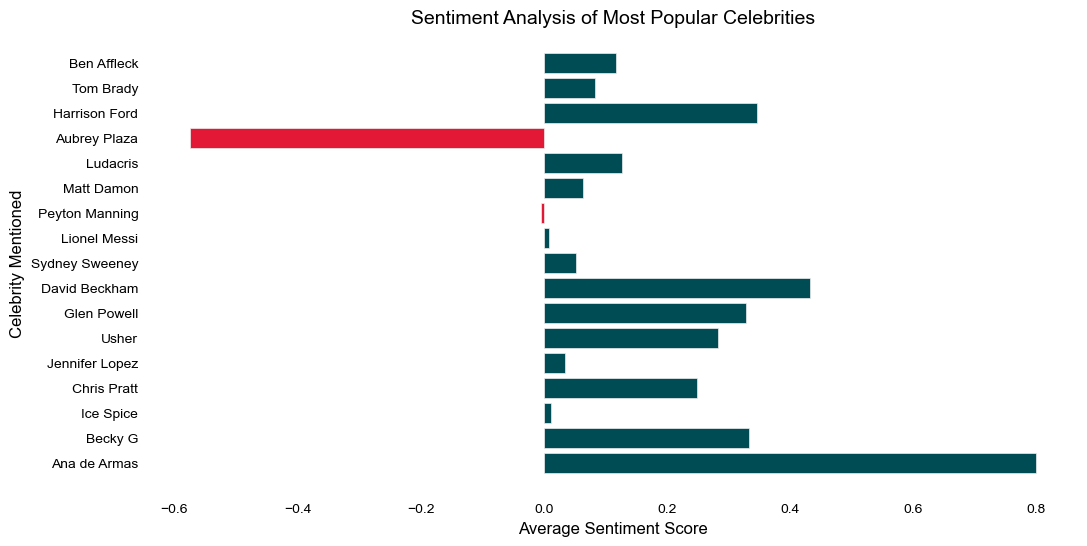

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    "Celebrity_Mentioned": [
        "Ben Affleck", "Tom Brady", "Harrison Ford", "Matt Damon", "Aubrey Plaza", "Ludacris", "Sydney Sweeney", 
        "Peyton Manning", "Lionel Messi", "Ice Spice", "David Beckham", "Glen Powell", "Jennifer Lopez", 
        "Usher", "Chris Pratt", "Becky G", "Ana de Armas"
    ],
    "Average_Sentiment": [
        0.117611, 0.084044, 0.346946, 0.064205, -0.574384, 0.126893, 0.052990, 
        -0.004232, 0.009211, 0.011364, 0.433565, 0.329167, 0.035317, 
        0.283627, 0.250000, 0.333333, 0.800000
    ],
    "Positive_Count": [420, 171, 83, 25, 2, 27, 5, 5, 7, 1, 6, 4, 2, 3, 2, 1, 1],
    "Negative_Count": [13, 46, 10, 2, 55, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Sort by most mentioned (Positive + Negative counts)
df["Total_Mentions"] = df["Positive_Count"] + df["Negative_Count"]
df_sorted = df.sort_values(by="Total_Mentions", ascending=False)

# Plot Sentiment Analysis
plt.figure(figsize=(12, 6), facecolor="none")  # Transparent background
bars = plt.barh(df_sorted["Celebrity_Mentioned"], df_sorted["Average_Sentiment"], 
                color=['#004C54' if x >= 0 else '#E31837' for x in df_sorted["Average_Sentiment"]])

plt.xlabel("Average Sentiment Score", fontsize=12, color="black")
plt.ylabel("Celebrity Mentioned", fontsize=12, color="black")
plt.title("Sentiment Analysis of Most Popular Celebrities", fontsize=14, color="black")

# Remove grid and set transparent background
plt.gca().invert_yaxis()
plt.gca().set_facecolor("none")  
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

In [110]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter  # Import Counter

# Filter the tweets to only include those from Missouri and labeled as 'negative'
missouri_negative_tweets = data[data['sentiment'] == 'negative']

# Combine all negative tweets' text into a single string
text = ' '.join(missouri_negative_tweets['text'])

# Tokenize words and remove stopwords
filtered_words = [word.lower() for word in text.split() if word.lower() not in STOPWORDS]

# Count word frequencies
word_counts = Counter(filtered_words)

# Ensure at least two words exist to get the second most common
if len(word_counts) > 1:
    most_common_word, most_common_count = word_counts.most_common(2)[1]  # Get the second most common word
    print(f"Second most common word: '{most_common_word}' (appeared {most_common_count} times)")
else:
    print("Not enough words to determine the second most common word.")

# Create the word cloud
word_cloud = WordCloud(
    background_color='black',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=40,
    scale=5,
    mask=twitter_mask,  # Apply the Twitter bird mask
    contour_color='steelblue',
    contour_width=2,
    random_state=1,
    colormap='Reds'  # Set color map to red shades
).generate(text)
top_10_negative_words = word_counts.most_common(10)
print("Top 10 most negative words:", top_10_negative_words)
# Plot the word cloud
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
fig.suptitle('Word Cloud for Negative Tweets from Missouri', fontsize=20)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

KeyError: 'sentiment'

In [111]:
df_tweets.head()

created_at  \
0  2025-02-10T03:16:57.000Z   
1  2025-02-10T03:16:49.000Z   
2  2025-02-10T03:16:48.000Z   
3  2025-02-10T03:16:46.000Z   
4  2025-02-10T03:16:46.000Z   

                                                text      conversation_id  \
0  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789225308409951   
1  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789188876894329   
2  THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...  1888789186284503124   
3                               I love you @TomBrady  1888789179074793761   
4                               I love you @TomBrady  1888789179074793761   

  reply_settings   edit_history_tweet_ids lang  \
0       everyone  ['1888789225308409951']   es   
1       everyone  ['1888789188876894329']   es   
2       everyone  ['1888789186284503124']   en   
3       everyone  ['1888789179074793761']   en   
4       everyone  ['1888789179074793761']   en   

                                   referenced_tweets  possibly_sensitive  \
0  [{'type': 'retweeted', 'id': '1888782268186890...               False   
1  [{'type': 'retweeted', 'id': '1888782268186890...               False   
2                                                NaN               False   
3                                                NaN               False   
4                                                NaN               False   

                    id   author_id  ...      username                 name  \
0  1888789225308409951   206743570  ...    juanmelriv  || •)🇮🇩 Juan P Melo   
1  1888789188876894329   282285390  ...  Camila110598                Camm♡   
2  1888789186284503124   246885450  ...      SevazCFM            Sebastián   
3  1888789179074793761  1921582838  ...      Vince_4L          Harvey Dent   
4  1888789179074793761  1921582838  ...      Vince_4L          Harvey Dent   

     brand      geo.place_id  attachments.poll_ids  withheld.country_codes  \
0  Dunkin'               NaN                   NaN                     NaN   
1  Dunkin'               NaN                   NaN                     NaN   
2  Dunkin'  b19e24ce42ccd6aa                   NaN                     NaN   
3  Dunkin'               NaN                   NaN                     NaN   
4  Dunkin'               NaN                   NaN                     NaN   

   geo.coordinates.type  geo.coordinates.coordinates      hashtags     state  
0                   NaN                          NaN            []      None  
1                   NaN                          NaN            []      None  
2                   NaN                          NaN  [#SuperBowl]      None  
3                   NaN                          NaN            []  Michigan  
4                   NaN                          NaN            []  Michigan  

[5 rows x 38 columns]

In [112]:
# Dictionary of tweet counts by state (including abbreviations)
tweets_by_state = {
    "California": 2304, "Missouri": 2295, "Texas": 1661, "Pennsylvania": 1526, "New York": 1330,
    "TX": 1313, "Indiana": 1255, "Florida": 945, "FL": 921, "Alaska": 913, "CA": 797, "GA": 790,
    "Tennessee": 744, "Illinois": 618, "Georgia": 581, "OH": 575, "SC": 546, "Ohio": 541, "NY": 511,
    "Michigan": 471, "North Carolina": 465, "DE": 456, "Delaware": 446, "MI": 436, "VA": 431,
    "Massachusetts": 422, "IN": 416, "New Jersey": 349, "NJ": 334, "PA": 328, "Arizona": 324,
    "Virginia": 303, "Louisiana": 296, "Minnesota": 289, "Washington": 254, "TN": 249, "WA": 245,
    "AZ": 229, "KY": 225, "Maryland": 221, "AL": 214, "Alabama": 213, "MN": 208, "Colorado": 204,
    "NC": 196, "Kentucky": 196, "Iowa": 173, "CO": 172, "WI": 156, "MA": 155, "South Carolina": 154,
    "Nevada": 154, "IL": 148, "KS": 146, "Maine": 146, "Oklahoma": 139, "Idaho": 137, "MO": 136,
    "New Mexico": 133, "LA": 131
}

# Consolidate abbreviations with full state names
state_mapping = {
    "TX": "Texas", "FL": "Florida", "CA": "California", "GA": "Georgia", "OH": "Ohio", "SC": "South Carolina",
    "NY": "New York", "DE": "Delaware", "MI": "Michigan", "VA": "Virginia", "IN": "Indiana",
    "NJ": "New Jersey", "PA": "Pennsylvania", "TN": "Tennessee", "WA": "Washington", "AZ": "Arizona",
    "KY": "Kentucky", "AL": "Alabama", "MN": "Minnesota", "NC": "North Carolina", "CO": "Colorado",
    "WI": "Wisconsin", "MA": "Massachusetts", "IL": "Illinois", "KS": "Kansas", "MO": "Missouri",
    "LA": "Louisiana"
}

# Aggregate tweets under full state names
cleaned_tweets_by_state = {}
for state, count in tweets_by_state.items():
    full_state = state_mapping.get(state, state)  # Convert abbreviations to full names
    cleaned_tweets_by_state[full_state] = cleaned_tweets_by_state.get(full_state, 0) + count

# Convert cleaned tweet data to DataFrame
df_tweets_cleaned = pd.DataFrame(list(cleaned_tweets_by_state.items()), columns=["state", "tweet_count"])

# US State Population Data (2023 estimates)
state_population = {
    "California": 39250000, "Texas": 29500000, "New York": 19450000, "Florida": 21700000,
    "Illinois": 12670000, "Pennsylvania": 12800000, "Ohio": 11750000, "Georgia": 10700000,
    "North Carolina": 10500000, "Michigan": 10000000, "New Jersey": 9288994, "Virginia": 8631000,
    "Washington": 7690000, "Arizona": 7150000, "Massachusetts": 7000000, "Tennessee": 6900000,
    "Indiana": 6800000, "Missouri": 6160000, "Maryland": 6050000, "Wisconsin": 5850000,
    "Colorado": 5800000, "Minnesota": 5700000, "South Carolina": 5110000, "Alabama": 4900000,
    "Louisiana": 4600000, "Kentucky": 4500000, "Oregon": 4200000, "Oklahoma": 3950000,
    "Connecticut": 3600000, "Utah": 3300000, "Iowa": 3200000, "Nevada": 3100000, "Arkansas": 3000000,
    "Mississippi": 2900000, "Kansas": 2900000, "New Mexico": 2100000, "Nebraska": 2000000,
    "West Virginia": 1800000, "Idaho": 1800000, "Hawaii": 1400000, "New Hampshire": 1400000,
    "Maine": 1300000, "Montana": 1100000, "Rhode Island": 1100000, "Delaware": 990000,
    "South Dakota": 890000, "North Dakota": 760000, "Alaska": 730000, "Vermont": 640000,
    "Wyoming": 580000
}

# Convert population dictionary to DataFrame
df_population = pd.DataFrame(list(state_population.items()), columns=["state", "population"])

# Merge tweet counts with population data
df_tweets_per_capita = df_tweets_cleaned.merge(df_population, on="state", how="left")

# Drop states with missing population data
df_tweets_per_capita = df_tweets_per_capita.dropna()

# Calculate tweets per capita
df_tweets_per_capita["tweets_per_capita"] = df_tweets_per_capita["tweet_count"] / df_tweets_per_capita["population"]

# Find the state with the highest tweets per capita
highest_tweets_per_capita = df_tweets_per_capita.loc[df_tweets_per_capita["tweets_per_capita"].idxmax()]

# Display results
df_tweets_per_capita.head(10)

state  tweet_count  population  tweets_per_capita
0    California         3101    39250000           0.000079
1      Missouri         2431     6160000           0.000395
2         Texas         2974    29500000           0.000101
3  Pennsylvania         1854    12800000           0.000145
4      New York         1841    19450000           0.000095
5       Indiana         1671     6800000           0.000246
6       Florida         1866    21700000           0.000086
7        Alaska          913      730000           0.001251
8       Georgia         1371    10700000           0.000128
9     Tennessee          993     6900000           0.000144